
## Clustering No Jerárquicos

Una empresa de plataforma cloud quiere segmentar sus microservicios para diseñar políticas diferenciadas de observabilidad, escalado y reducción de acumulación de mantenimiento pendiente. Para ello, se ha recopilado información de $18$ microservicios en producción. Las variables disponibles son:

+ `Servicio`: identificador del microservicio.

+ `Uptime`: porcentaje de tiempo que el microservicio ha estado respondiendo correctamente durante un mes ($\%$).

+ `Latency`: latencia de respuesta (ms).

+ `Error_rate`: tasa de errores sobre el total de peticiones ($\%$).

+ `Deploys_week`: despliegues promedio por semana (ritmo de publicaciones o cadencia de despliegues).

El objetivo es aplicar técnicas de <u>clustering no jerárquico</u> para identificar perfiles (por ejemplo: microservicios “premium” muy estables, microservicios de alta cadencia, microservicios legacy con acumulación de mantenimiento pendiente, etc.). La base de datos se resume en la siguiente tabla:

| Servicio | Uptime | Latency        | Error_rate     | Deploys_week |
| -------- | -----: | -------------: | -------------: | -----------: |
| Svc_01   |  99.98 |             90 |           0.18 |          3.0 |
| Svc_02   |  99.96 |            105 |           0.22 |          2.5 |
| Svc_03   |  99.94 |            120 |           0.30 |          3.5 |
| Svc_04   |  99.99 |             80 |           0.15 |          2.0 |
| Svc_05   |  99.95 |            115 |           0.25 |          3.0 |
| Svc_06   |  99.93 |            130 |           0.35 |          4.0 |
| Svc_07   |  99.55 |            210 |           1.60 |         18.0 |
| Svc_08   |  99.40 |            240 |           2.10 |         22.0 |
| Svc_09   |  99.60 |            200 |           1.40 |         16.0 |
| Svc_10   |  99.30 |            280 |           2.50 |         26.0 |
| Svc_11   |  99.50 |            230 |           1.90 |         20.0 |
| Svc_12   |  99.35 |            260 |           2.30 |         24.0 |
| Svc_13   |  98.20 |            520 |           4.20 |          1.8 |
| Svc_14   |  98.40 |            450 |           3.60 |          2.5 |
| Svc_15   |  97.20 |            780 |           6.00 |          0.8 |
| Svc_16   |  97.60 |            610 |           5.10 |          1.2 |
| Svc_17   |  98.60 |            390 |           3.20 |          3.0 |
| Svc_18   |  97.00 |            900 |           6.80 |          0.6 |

Realizar los siguientes apartados:

1. Crear la base de datos a partir de dicha información y realizar el análisis exploratorio detallado de la misma. ¿Por qué siempre se debe de realizar esta etapa antes de llevar a cabo el proceso de modelización oportuno?


2. Realizar el análisis de la existencia de relación y semejanza entre las variables. Explicar en qué consiste dicho procedimiento y los motivos por los que tenemos que realizarlo en el contexto de un problema de clustering.


3. Calcular la matriz de proximidad utilizando la distancia euclidiana. Explicar la utilidad de dicha matriz de proximidad a la hora de llevar a cabo un problema de clustering.


4. Estimar e interpretar los modelos de clustering no jerárquicos considerando los cuatro métodos vistos en clase. Describir brevemente las principales diferencias entre cada uno de los métodos utilizados.


5. Calcular el número de clústers óptimos para cada uno de los cuatro métodos a partir de los tres criterios estudiados en clase. Indicar cuáles son las principales diferencias de los tres criterios que tenéis que implementar en este apartado.

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
wdata <- data.frame(
  Servicio = c(
    "Svc_01","Svc_02","Svc_03","Svc_04","Svc_05","Svc_06",
    "Svc_07","Svc_08","Svc_09","Svc_10","Svc_11","Svc_12",
    "Svc_13","Svc_14","Svc_15","Svc_16","Svc_17","Svc_18"
  ),
  Uptime = c(
    99.98, 99.96, 99.94, 99.99, 99.95, 99.93,
    99.55, 99.40, 99.60, 99.30, 99.50, 99.35,
    98.20, 98.40, 97.20, 97.60, 98.60, 97.00
  ),
  Latency = c(
    90, 105, 120, 80, 115, 130,
    210, 240, 200, 280, 230, 260,
    520, 450, 780, 610, 390, 900
  ),
  Error_rate = c(
    0.18, 0.22, 0.30, 0.15, 0.25, 0.35,
    1.60, 2.10, 1.40, 2.50, 1.90, 2.30,
    4.20, 3.60, 6.00, 5.10, 3.20, 6.80
  ),
  Deploys_week = c(
    3.0, 2.5, 3.5, 2.0, 3.0, 4.0,
    18.0, 22.0, 16.0, 26.0, 20.0, 24.0,
    1.8, 2.5, 0.8, 1.2, 3.0, 0.6
  )
)

wdata


Servicio,Uptime,Latency,Error_rate,Deploys_week
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Svc_01,99.98,90,0.18,3.0
Svc_02,99.96,105,0.22,2.5
Svc_03,99.94,120,0.30,3.5
Svc_04,99.99,80,0.15,2.0
Svc_05,99.95,115,0.25,3.0
Svc_06,99.93,130,0.35,4.0
Svc_07,99.55,210,1.60,18.0
Svc_08,99.40,240,2.10,22.0
Svc_09,99.60,200,1.40,16.0


In [ ]:
str(wdata)

'data.frame':	18 obs. of  5 variables:
 $ Servicio    : chr  "Svc_01" "Svc_02" "Svc_03" "Svc_04" ...
 $ Uptime      : num  100 100 99.9 100 100 ...
 $ Latency     : num  90 105 120 80 115 130 210 240 200 280 ...
 $ Error_rate  : num  0.18 0.22 0.3 0.15 0.25 0.35 1.6 2.1 1.4 2.5 ...
 $ Deploys_week: num  3 2.5 3.5 2 3 4 18 22 16 26 ...


**Descripción de la base de datos**

La base de datos recoge información operativa de **18 microservicios en producción** pertenecientes a una empresa de plataforma *cloud*. El objetivo principal es **segmentar los microservicios** para diseñar **políticas diferenciadas de observabilidad, escalado y gestión de deuda técnica**, en función de su comportamiento y estabilidad.

Cada observación corresponde a un microservicio distinto y las variables disponibles son las siguientes:

- **Servicio**: identificador del microservicio. Es una variable categórica nominal que permite distinguir cada componente del sistema.

- **Uptime**: porcentaje de tiempo durante el cual el microservicio ha estado disponible y respondiendo correctamente a lo largo de un mes. Es una variable cuantitativa continua expresada en porcentaje ($\%$) y mide la **fiabilidad y estabilidad operativa** del servicio.

- **Latency**: latencia media de respuesta del microservicio, medida en milisegundos (ms). Es una variable cuantitativa continua que refleja el **rendimiento y la experiencia de usuario**, siendo valores elevados indicativos de posibles cuellos de botella o problemas de escalado.

- **Error_rate**: porcentaje de peticiones que terminan en error sobre el total de peticiones atendidas. Es una variable cuantitativa continua expresada en porcentaje ($\%$) y captura la **calidad del servicio** y su robustez ante carga o fallos.

- **Deploys_week**: número medio de despliegues por semana. Es una variable cuantitativa continua que mide la **cadencia de despliegue** o ritmo de cambios en producción, relacionada tanto con prácticas *DevOps* como con el riesgo de introducir inestabilidad.

En conjunto, estas variables permiten caracterizar cada microservicio desde el punto de vista de **disponibilidad, rendimiento, calidad y dinámica de cambios**, proporcionando una base adecuada para aplicar técnicas de **clustering o segmentación** orientadas a la toma de decisiones operativas.


In [ ]:
# Seleccionar solo variables numéricas
num_vars <- wdata[, sapply(wdata, is.numeric)]

# Tipificar (escalado estándar)
datos <- as.data.frame(scale(num_vars, center = TRUE, scale = TRUE))

# Si quieres mantener también el nombre del municipio:
datos <- cbind(Equipo = wdata$Servicio ,
                           datos)

datos


Equipo,Uptime,Latency,Error_rate,Deploys_week
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Svc_01,0.8983540,-0.9299994,-1.03021019,-0.5953073
Svc_02,0.8783783,-0.8686058,-1.01114694,-0.6489386
Svc_03,0.8584025,-0.8072122,-0.97302042,-0.5416760
Svc_04,0.9083419,-0.9709284,-1.04450764,-0.7025699
Svc_05,0.8683904,-0.8276767,-0.99684949,-0.5953073
Svc_06,0.8484146,-0.7662831,-0.94919135,-0.4880447
Svc_07,0.4688753,-0.4388506,-0.35346456,1.0136313
Svc_08,0.3190572,-0.3160634,-0.11517385,1.4426817
Svc_09,0.5188147,-0.4797796,-0.44878085,0.7991062


In [ ]:
# Realizamos el análisis exploratorio de las variables utilizadas
summary(wdata)

   Servicio             Uptime         Latency        Error_rate    
 Length:18          Min.   :97.00   Min.   : 80.0   Min.   :0.1500  
 Class :character   1st Qu.:98.45   1st Qu.:122.5   1st Qu.:0.3125  
 Mode  :character   Median :99.45   Median :235.0   Median :2.0000  
                    Mean   :99.08   Mean   :317.2   Mean   :2.3417  
                    3rd Qu.:99.94   3rd Qu.:435.0   3rd Qu.:3.5000  
                    Max.   :99.99   Max.   :900.0   Max.   :6.8000  
  Deploys_week   
 Min.   : 0.600  
 1st Qu.: 2.125  
 Median : 3.000  
 Mean   : 8.550  
 3rd Qu.:17.500  
 Max.   :26.000  

In [ ]:
# Cargar librería necesaria para kurtosis
if(!require(moments, quietly = TRUE)){
  install.packages("moments", repos = "https://cloud.r-project.org")
  library(moments)
}

# Desviación estándar de todas las variables numéricas
sapply(wdata, sd, na.rm = TRUE)

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”


Servicio       Uptime      Latency   Error_rate Deploys_week 
          NA     1.001214   244.325134     2.098277     9.322916

In [ ]:
# Curtosis de todas las variables numéricas
sapply(wdata[sapply(wdata, is.numeric)], kurtosis, na.rm = TRUE)


Uptime      Latency   Error_rate Deploys_week 
    2.520406     3.203682     2.460000     1.910360

**<u>Interpretación resultados</u>.–**

Tras la **tipificación de las variables**, se analizan las propiedades estadísticas básicas del conjunto de datos correspondiente a los **18 microservicios**, centrándonos exclusivamente en las variables cuantitativas (*Uptime, Latency, Error_rate y Deploys_week*), ya que **Servicio** actúa únicamente como identificador.

**Análisis descriptivo tras tipificación**

- **Uptime**  
  Presenta valores muy elevados y concentrados, con una media de **99.08 %** y una desviación estándar cercana a 1 (**sd ≈ 1.00**), lo que indica **muy poca variabilidad relativa**. La curtosis (**≈ 2.52**) sugiere una distribución ligeramente más concentrada que la normal, sin colas extremas. Esto refleja que la mayoría de microservicios mantienen una **alta disponibilidad**, con pocos casos claramente problemáticos.

- **Latency**  
  Muestra una **alta dispersión**, con valores que oscilan entre **80 ms y 900 ms**, una media de **317.2 ms** y una desviación estándar elevada (**sd ≈ 244.3**). La curtosis (**≈ 3.20**) indica una distribución algo más apuntada, con presencia de valores extremos, lo que sugiere que existen microservicios con **problemas severos de rendimiento** frente a otros mucho más estables.

- **Error_rate**  
  Presenta una variabilidad moderada–alta, con una media de **2.34 %** y desviación estándar **≈ 2.10**. La curtosis (**≈ 2.46**) es cercana a la normal, indicando una distribución relativamente equilibrada, aunque con microservicios claramente más propensos a errores que otros. Esta variable resulta clave para identificar **servicios frágiles o con deuda técnica acumulada**.

- **Deploys_week**  
  Es la variable con **mayor heterogeneidad relativa**, con valores entre **0.6 y 26 despliegues por semana**, una media de **8.55** y una desviación estándar elevada (**sd ≈ 9.32**). La curtosis baja (**≈ 1.91**) indica una distribución más aplanada, reflejando la coexistencia de microservicios muy estables (pocos despliegues) con otros altamente dinámicos (alta cadencia de cambios).

**Conclusión global**

La tipificación confirma que las variables presentan **escalas y variabilidades muy distintas**, especialmente *Latency* y *Deploys_week*, lo que **justifica plenamente el escalado previo** antes de aplicar técnicas de **clustering**.  

Desde un punto de vista operativo:
- *Uptime* discrimina poco, pero permite detectar servicios críticos.
- *Latency* y *Error_rate* capturan problemas de rendimiento y calidad.
- *Deploys_week* aporta información estructural sobre la **dinámica DevOps**.

En conjunto, estas variables tipificadas proporcionan una base adecuada para segmentar los microservicios en **perfiles operativos diferenciados**.


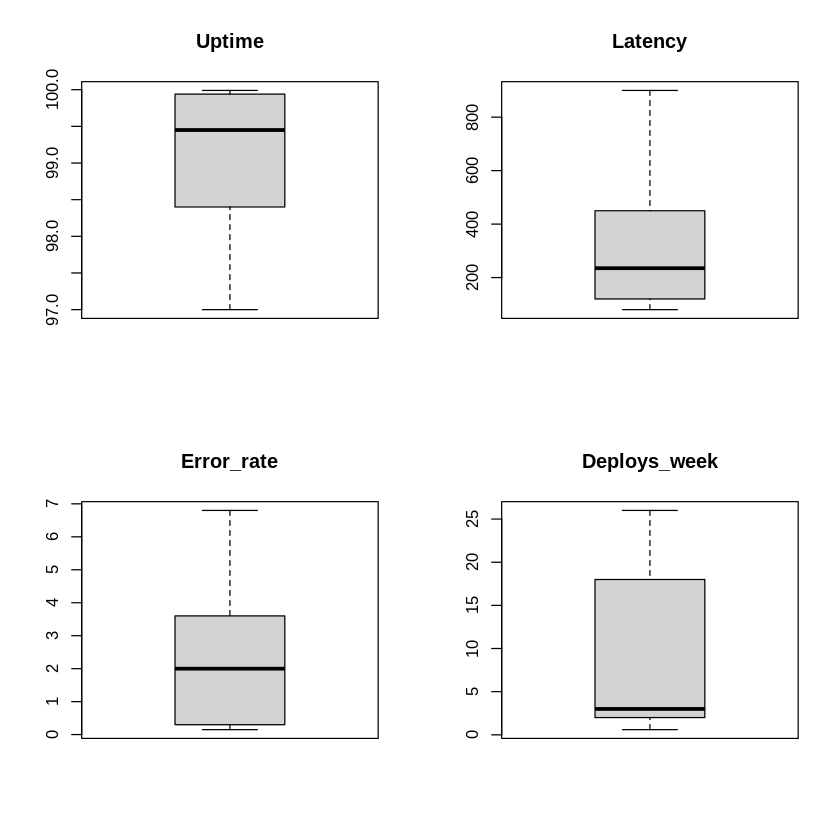

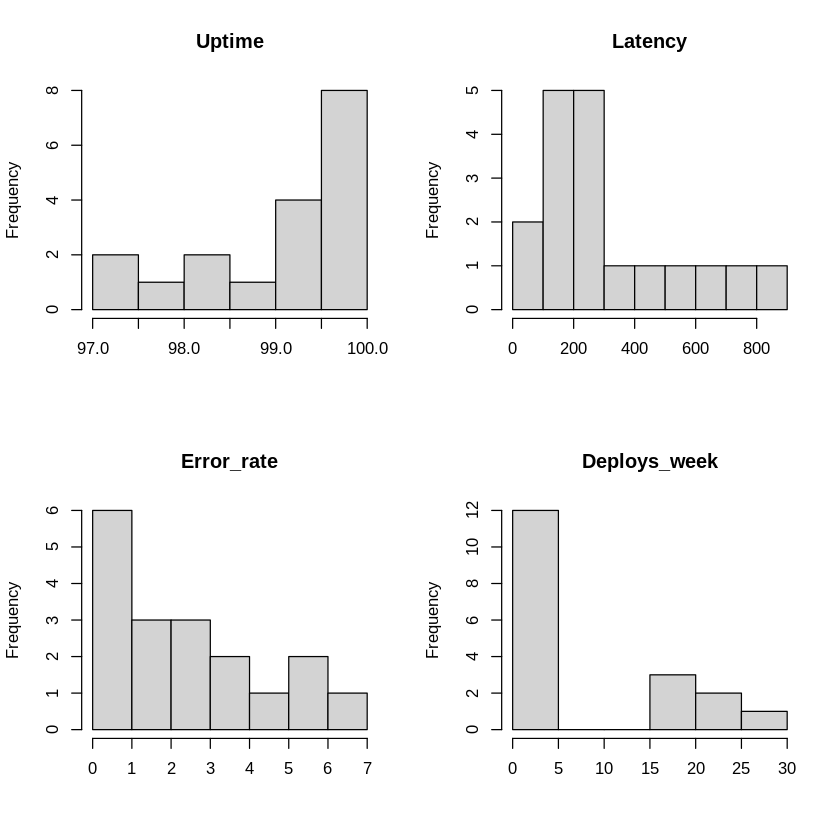

In [ ]:
# Seleccionar solo las variables numéricas
numeric_vars <- wdata[, sapply(wdata, is.numeric)]

# ---------- BOXPLOTS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  boxplot(numeric_vars[, i], main = colnames(numeric_vars)[i])
}

# ---------- HISTOGRAMAS AUTOMÁTICOS ----------
par(mfrow = c(2, ceiling(ncol(numeric_vars)/2)))
for(i in 1:ncol(numeric_vars)){
  hist(numeric_vars[, i], main = colnames(numeric_vars)[i], xlab = "")
}

# Volver a la configuración normal
par(mfrow = c(1,1))


**<u>Interpretación resultados</u>.–**

Los **boxplots** y **histogramas** permiten analizar la **distribución**, **variabilidad** y **asimetrías** de las cuatro variables numéricas del conjunto de microservicios: *Uptime*, *Latency*, *Error_rate* y *Deploys_week*. A continuación se presenta un análisis comparativo conjunto.

**Comparación de dispersión y variabilidad**

A partir de los **boxplots**, se observan claras diferencias en el grado de dispersión entre variables:

- **Uptime** presenta una **variabilidad muy reducida**, con valores altamente concentrados cerca del 100 %. Esto indica que la mayoría de los microservicios mantienen una disponibilidad elevada y homogénea, sin valores atípicos extremos.

- **Latency** muestra una **dispersión considerable**, con un rango amplio y una cola superior pronunciada. Esto refleja la coexistencia de microservicios con tiempos de respuesta aceptables y otros con **latencias significativamente más elevadas**, potencialmente problemáticas.

- **Error_rate** presenta una **variabilidad moderada**, con valores concentrados en tasas bajas pero con algunos microservicios que alcanzan porcentajes de error claramente superiores, lo que sugiere diferencias en estabilidad o calidad del código.

- **Deploys_week** es la variable con **mayor heterogeneidad relativa**, mostrando una fuerte dispersión y asimetría. Existen microservicios con muy baja frecuencia de despliegues y otros con cadencias muy altas, reflejando estrategias de desarrollo y mantenimiento muy distintas.

**Comparación de la forma de las distribuciones**

Los **histogramas** permiten analizar la forma de las distribuciones:

- **Uptime** presenta una distribución **asimétrica a la izquierda**, con fuerte concentración en valores altos, característica habitual en métricas de disponibilidad en sistemas productivos.

- **Latency** muestra una distribución **asimétrica a la derecha**, con presencia de valores extremos, lo que confirma la existencia de microservicios con problemas de rendimiento.

- **Error_rate** presenta una distribución relativamente dispersa pero con mayor densidad en valores bajos, indicando que la mayoría de los servicios operan con tasas de error reducidas, aunque existen casos más inestables.

- **Deploys_week** exhibe una distribución claramente **asimétrica**, con acumulación en valores bajos y una cola larga hacia valores altos, reflejando distintos niveles de madurez y dinamismo en los procesos DevOps.

**Conclusión**

Las variables analizadas muestran **estructuras internas muy diferentes**. Mientras que *Uptime* es altamente homogénea y discrimina poco entre microservicios, *Latency*, *Error_rate* y especialmente *Deploys_week* presentan una variabilidad significativa que resulta clave para la **segmentación operativa**. Estas diferencias justifican el uso de técnicas de **clustering tras tipificación**, permitiendo identificar perfiles de microservicios con comportamientos diferenciados en rendimiento, estabilidad y dinámica de despliegue.


Para el análisis posterior es necesario normalizar las variables numéricas.

In [ ]:
# Seleccionar solo variables numéricas
num_vars <- wdata[, sapply(wdata, is.numeric)]

# Tipificar (escalado estándar)
datos <- as.data.frame(scale(num_vars, center = TRUE, scale = TRUE))

# Si quieres mantener también el nombre del municipio:
datos <- cbind(Servicio = wdata$Servicio,
                           datos)

datos


Servicio,Uptime,Latency,Error_rate,Deploys_week
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Svc_01,0.8983540,-0.9299994,-1.03021019,-0.5953073
Svc_02,0.8783783,-0.8686058,-1.01114694,-0.6489386
Svc_03,0.8584025,-0.8072122,-0.97302042,-0.5416760
Svc_04,0.9083419,-0.9709284,-1.04450764,-0.7025699
Svc_05,0.8683904,-0.8276767,-0.99684949,-0.5953073
Svc_06,0.8484146,-0.7662831,-0.94919135,-0.4880447
Svc_07,0.4688753,-0.4388506,-0.35346456,1.0136313
Svc_08,0.3190572,-0.3160634,-0.11517385,1.4426817
Svc_09,0.5188147,-0.4797796,-0.44878085,0.7991062


**¿Por qué es imprescindible el análisis exploratorio antes de modelizar?**

El análisis exploratorio es una etapa **fundamental e imprescindible** antes de cualquier proceso de modelización por las siguientes razones:

1. **Comprensión del problema y de los datos**: permite entender qué representa cada variable, su rango, su variabilidad y su relevancia práctica.
2. **Detección de problemas en los datos**: facilita identificar asimetrías, escalas incompatibles, valores extremos o distribuciones no adecuadas para ciertos modelos.
3. **Elección correcta del modelo**: la forma de las distribuciones y la heterogeneidad observada orientan la selección de técnicas apropiadas (por ejemplo, clustering tras estandarización en lugar de modelos que asumen normalidad).
4. **Preparación adecuada de los datos**: justifica transformaciones como tipificación, normalización o incluso reducción de dimensionalidad.
5. **Evitar conclusiones erróneas**: modelizar sin EDA puede conducir a resultados espurios o mal interpretados, al aplicar modelos cuyas hipótesis no se cumplen.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [ ]:
# Obtenemos información gráfica sobre la relación de las variables
# Instalamos la librería GGally
install.packages("GGally")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargamos la librería
library(GGally)
library(dplyr)

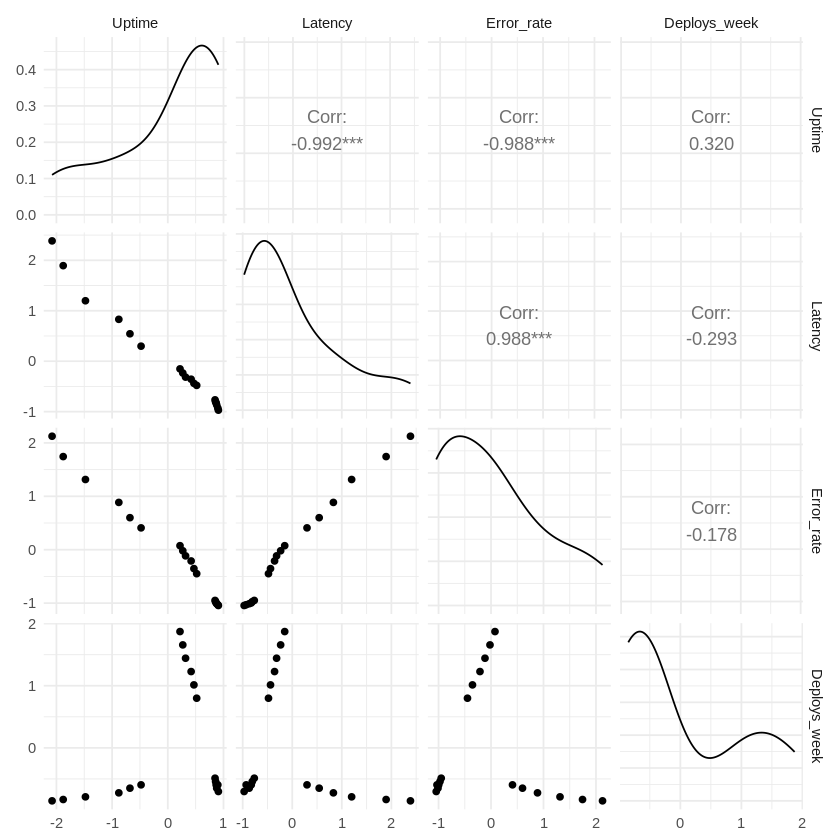

In [ ]:
# Seleccionar solo variables numéricas
datos_est <- datos %>% select(where(is.numeric))

# ggpairs solo con columnas numéricas
ggpairs(datos_est) +
  theme_minimal()


**<u>Interpretación resultados</u>.-**  

La matriz de gráficos permite analizar la **estructura de relación entre las variables estandarizadas** asociadas al comportamiento de los microservicios: *Uptime*, *Latency*, *Error_rate* y *Deploys_week*. A diferencia de un escenario con variables casi independientes, se observa una **fuerte dependencia entre las métricas de rendimiento y fiabilidad**.

En particular, *Uptime* presenta **correlaciones negativas muy elevadas** tanto con *Latency* como con *Error_rate*, lo que indica que los microservicios con mayores tiempos de respuesta y mayores tasas de error tienden sistemáticamente a mostrar menor disponibilidad. De forma coherente, *Latency* y *Error_rate* están **fuertemente correlacionadas de manera positiva**, sugiriendo que ambos indicadores capturan un mismo problema subyacente de degradación del servicio.

Por el contrario, *Deploys_week* muestra **relaciones mucho más débiles** con el resto de variables: una asociación positiva moderada con *Uptime* y relaciones negativas suaves con *Latency* y *Error_rate*. Esto sugiere que una mayor cadencia de despliegues podría estar vinculada a servicios algo más estables, aunque sin un patrón lineal dominante.

En conjunto, la matriz revela la existencia de un **bloque altamente correlacionado de variables técnicas** (*Uptime*, *Latency* y *Error_rate*), junto a una variable (*Deploys_week*) que aporta información complementaria. Este resultado es clave para el análisis posterior, ya que alerta sobre **posible redundancia informativa** y justifica la necesidad de considerar selección de variables o técnicas de reducción de dimensión antes de aplicar modelos de clustering.


In [ ]:
# Función para obtener p-valores de cor.test
p_matrix <- function(df){
  vars <- colnames(df)
  n <- length(vars)
  M <- matrix(NA, n, n, dimnames = list(vars, vars))

  for(i in 1:n){
    for(j in 1:n){
      M[i,j] <- cor.test(df[[i]], df[[j]])$p.value
    }
  }
  return(M)
}

# Obtener matriz de p-valores
p_values_table <- p_matrix(datos_est)

# Mostrar la tabla
p_values_table

,Uptime,Latency,Error_rate,Deploys_week
Uptime,0.000000e+00,4.989370e-16,1.937041e-14,0.1950681
Latency,4.989370e-16,0.000000e+00,2.427700e-14,0.2384381
Error_rate,1.937041e-14,2.427700e-14,1.160434e-126,0.4810096
Deploys_week,1.950681e-01,2.384381e-01,4.810096e-01,0.0000000


En un análisis de correlación, evaluamos si la relación observada entre dos variables podría explicarse simplemente por azar. Para ello se plantea un contraste de hipótesis:

- **Hipótesis nula ($H_0$)**:
No existe correlación real entre las dos variables.
Matemáticamente:

$$𝐻_0: 𝜌=0$$

- **Hipótesis alternativa ($H_1$)**:
Sí existe correlación entre las dos variables (puede ser positiva o negativa).
Matemáticamente:
$$𝐻_1: 𝜌≠0$$


El p-valor indica la probabilidad de obtener una correlación igual o más extrema que la observada, asumiendo que la hipótesis nula es cierta.

Un **p-valor pequeño (habitualmente p < 0.05**) sugiere que sería **muy improbable obtener esa correlación por azar**, por lo que se **rechaza $H_0$** y se concluye que existe una correlación significativa.

Un **p-valor grande** implica que los datos observados son compatibles con ausencia de correlación, por lo que **no se puede rechazar $H_0$**.

A partir de la matriz de p-valores obtenida, se observa que las correlaciones entre **Uptime, Latency y Error_rate** presentan **p-valores extremadamente pequeños** (del orden de $10^{-14}$ o menores), lo que indica que dichas relaciones **son altamente significativas desde el punto de vista estadístico**. Esto confirma que las fuertes correlaciones observadas entre estas variables **no pueden explicarse por azar**.

Por el contrario, las relaciones que involucran a **Deploys_week** presentan **p-valores claramente superiores a 0.05**, por lo que **no se rechaza la hipótesis nula** en estos casos. En consecuencia, no existe evidencia estadística suficiente para afirmar que la cadencia de despliegues esté linealmente correlacionada con las métricas de rendimiento y fiabilidad consideradas.

En conjunto, este análisis confirma la existencia de un **bloque de variables altamente correlacionadas y estadísticamente significativas** (*Uptime*, *Latency* y *Error_rate*), mientras que *Deploys_week* aporta información adicional prácticamente independiente, lo que resulta especialmente relevante de cara a etapas posteriores.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

Ahora se calculará la matriz de proximidad o matriz de distancias entre las observaciones.

Se usará la función `dist()` para construir una matriz de distancias, que pertenece a la librería `base`. Se usará de la siguinete forma `dist(x, method = "euclidean")`, donde:

+ **x**: es el data numérico que contiene las observaciones y las variables.

+ **method**: indica el tipo de distancia que se desea calcular, en este caso se usará exclusivamnete:
  - "euclidean" (distancia euclidiana, por defecto)  

La función devolverá un objeto de clase `dist`, que almacena la matriz de distancias.




In [ ]:
# Calculamos la matriz de distancias empleando la distancia euclidiana
datos_dist = dist(datos_est, method = "euclidean")

In [ ]:
# Mostramos la estructura de la matriz de distancias
str(datos_dist)

 'dist' Named num [1:153] 0.0861 0.1511 0.1161 0.1117 0.2176 ...
 - attr(*, "Size")= int 18
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = datos_est, method = "euclidean")


In [ ]:
# Mostramos las primeras seis filas de la matriz de distancias
matrix_dist = as.matrix(datos_dist)[1:6, 1:6]
head(matrix_dist)

,1,2,3,4,5,6
1,0.00000000,0.08606932,0.15106226,0.1161233,0.11171698,0.21763794
2,0.08606932,0.00000000,0.13087053,0.1239234,0.06968270,0.20271428
3,0.15106226,0.13087053,0.00000000,0.2455488,0.06294994,0.07224324
4,0.11612331,0.12392336,0.24554881,0.0000000,0.18945644,0.31713913
5,0.11171698,0.06968270,0.06294994,0.1894564,0.00000000,0.13395807
6,0.21763794,0.20271428,0.07224324,0.3171391,0.13395807,0.00000000


In [ ]:
# Instalamos la librería factoextra
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’




In [ ]:
# Cargamos la librería factoextra
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



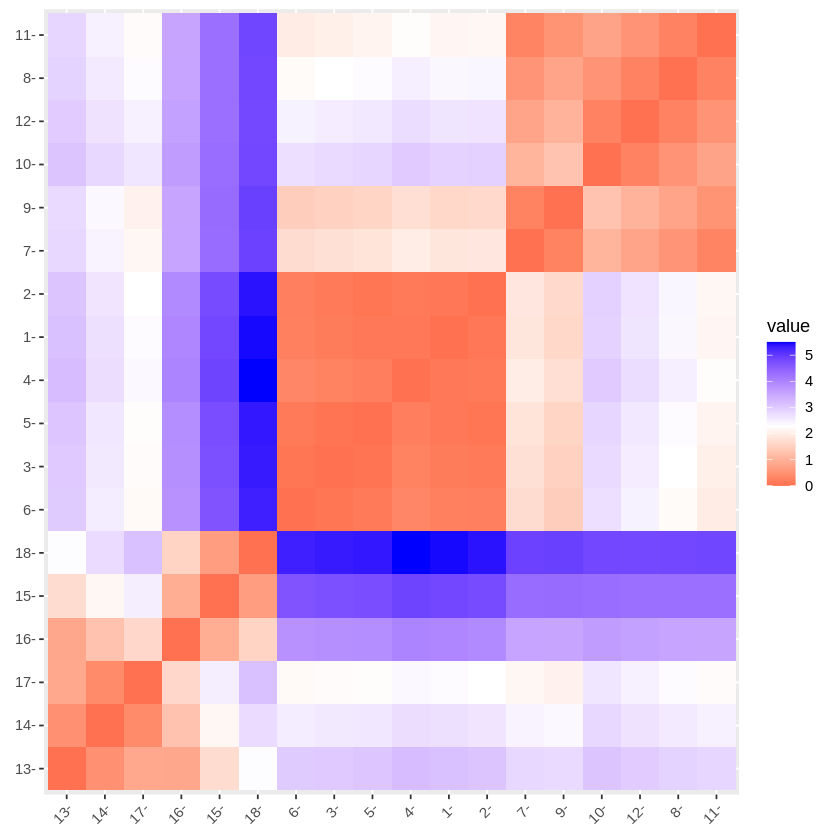

In [ ]:
# Representamos mediante escalas de color la distancia entre todas las observaciones para ver
# si detectamos grupos de observaciones
suppressWarnings(
  fviz_dist(datos_dist, show_labels = TRUE)
)

**<u>Interpretación resultados</u>.-**   La distancia usada es la **distancia euclidiana** la cuantifica **cuán diferentes son dos observaciones** midiendo la longitud del segmento que las une en un espacio multidimensional.

Si cada observación viene dada por $p$ variables, la distancia entre dos individuos $x = (x_1,\dots,x_p)$ e $y = (y_1,\dots,y_p)$ se calcula como:

$$
d_{\text{euclidiana}}(x,y)
= \sqrt{(x_1 - y_1)^2 + \cdots + (x_p - y_p)^2 }.
$$

– **Cuanto menor es la distancia**, más parecidas son las observaciones.  
– **Cuanto mayor es la distancia**, más diferentes son.  

El mapa de distancias muestra la matriz de proximidad entre los 18 servicios tras tipificar las variables y calcular la **distancia euclidiana** entre cada par de ellos. Cada celda representa la distancia entre dos servicios:  
– Tonos **rojizos** → distancias bajas → servicios **muy similares**.  
– Tonos **azulados** → distancias altas → servicios **muy diferentes**.

La diagonal principal aparece en rojo intenso, como es natural, ya que la distancia de cada servicio consigo mismo es cero.

Al analizar el patrón global, aparecen **zonas rojizas bien definidas** (especialmente hacia el centro del mapa, en la zona superior derecha y la inferior izquierda), lo que indica **bloques de servicios muy parecidos entre sí**, probablemente compartiendo niveles similares de `Uptime`,`Latency,``Error_rate`y `Deploys_week`. Estos bloques sugieren la presencia de **clústeres naturales y compactos**, que posteriormente deberían emerger con claridad en algoritmos no jerárquicos.

Por otro lado, se observan **manchas azul oscuro** localizadas, especialmente en forma de columna en la parte derecha y fila en la parte inferior. Estas zonas señalan servicios que son **marcadamente distintos** al resto, ya sea por su `Uptime` o `Latency` o `Error_rate` o `Deploys_week`. Es probable que estos servicios actúen como **observaciones aisladas** dentro del clustering o formen grupos muy reducidos.

Finalmente, combinando las áreas rojizas continuas con las zonas azuladas dispersas, el mapa sugiere la existencia de **entre tres y cuatro grupos** de servicios con perfiles diferenciados, lo cual respalda la pertinencia de avanzar hacia un análisis de clúster no jerárquico.


La **matriz de proximidad** es un elemento muy importante en los problemas de *clustering*, ya que recoge de el **grado de similitud o disimilitud entre todas las observaciones del conjunto de datos**. Cada entrada de la matriz cuantifica cuán “cercanos” o “lejanos” son dos individuos según una medida elegida (por ejemplo, distancia euclídea, Manhattan, correlación o similitud coseno), constituyendo así la base matemática sobre la que se construyen los grupos.

Su principal utilidad radica en que **transforma el conjunto de datos original en una representación relacional**, independiente del número de variables originales. Esto permite comparar observaciones de manera directa y homogénea, algo especialmente relevante cuando las variables han sido previamente tipificadas o cuando presentan distintas escalas y unidades. En este sentido, la matriz de proximidad sintetiza toda la información necesaria para evaluar patrones de agrupamiento.

En métodos de *clustering* **jerárquico**, la matriz de proximidad es el punto de partida del algoritmo: a partir de ella se decide qué observaciones o grupos se fusionan en cada etapa, y determina por completo la estructura del dendrograma resultante. En métodos **no jerárquicos** aunque la matriz no se construya explícitamente, el concepto de proximidad sigue siendo central, ya que la asignación de observaciones a clústeres se basa en minimizar distancias a centroides.

Finalmente, la matriz de proximidad permite **evaluar y comparar distintas métricas de distancia**, analizar la cohesión y separación entre grupos, y detectar observaciones atípicas o muy alejadas del resto. Por tanto, su correcta definición es clave, ya que condiciona de manera directa la estructura final de los clústeres y la interpretación del resultado del análisis.


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

A diferencia de los métodos jerárquicos, que construyen una secuencia completa de particiones anidadas, los enfoques no jerárquicos generan directamente una única partición del conjunto, lo que exige especificar o estimar parámetros clave como el número de grupos, la densidad mínima o la forma de los clusters. Esta característica los hace computacionalmente eficientes y particularmente adecuados para bases de datos de tamaño medio o grande.

En este estudio se considerarán **cuatro familias de métodos no jerárquicos**, cada una basada en un principio estructural diferente y capaz de capturar distintos tipos de patrones en los datos. Los **métodos basados en particiones** buscan la mejor asignación de observaciones a k clusters optimizando una función de distancia; los **métodos basados en densidad** detectan regiones densas y permiten descubrir grupos con formas arbitrarias; los **métodos basados en modelos** suponen que los datos provienen de una mezcla de distribuciones probabilísticas y asignan probabilidades de pertenencia a cada cluster; y los **métodos basados en grafos** utilizan relaciones de similitud para identificar comunidades en estructuras complejas que no necesariamente siguen métricas euclídeas.

Cada uno de estos enfoques será estimado e interpretado de manera individual, analizando cómo particionan los datos, qué tipo de estructura capturan y bajo qué supuestos operan. Este conjunto de métodos permite obtener una visión completa y comparada de la organización interna del conjunto de datos, destacando similitudes y diferencias entre estrategias basadas en geometría, densidad, probabilidad o conectividad.


El algoritmo **k-means** es uno de los métodos de *clustering* más utilizados debido a su eficiencia y simplicidad. Su objetivo es particionar un conjunto de datos en **k grupos no solapados**, de forma que cada observación pertenezca al cluster cuyo centro (o **centroide**) esté más próximo según una métrica de distancia,en este caso la **distancia euclidiana**.
El proceso es iterativo: primero asigna cada observación al centroide más cercano y después recalcula los centroides como la media de las observaciones asignadas. Este procedimiento se repite hasta que las asignaciones dejan de cambiar o se alcanza el número máximo de iteraciones. .

Su solución depende fuertemente de los valores iniciales de los centroides y puede converger a mínimos locales. Por ello es habitual ejecutar varias inicializaciones aleatorias y seleccionar la mejor solución.


Para estimar un modelo k-means en R se utiliza la función **`kmeans()`** de la librería *base*. Su sintaxis general es:

`kmeans(x, centers, iter.max = 10, nstart = 1, algorithm = "Hartigan-Wong")`

Los principales argumentos son:

- **`x`**: *data.frame* con **variables numéricas** sobre las que se realizará el clustering en este caso sería datos_est.
- **`centers`**: número de clusters **k** o bien un conjunto de centroides iniciales.
- **`nstart`**: número de distintas **inicializaciones aleatorias** a probar para evitar soluciones en mínimos locales ya comentada.
- **`iter.max`**: número máximo de iteraciones permitidas del algoritmo.
- **`algorithm`**: versión del algoritmo de optimización; por defecto `"Hartigan-Wong"` que es el más habitual y eficiente.



In [ ]:
# Fijamos semilla para reproducibilidad
set.seed(123)

In [ ]:
# Construímos el clúster no jerárquico con método k-means y distancia euclidiana
NHC_kmeans = kmeans(datos_est, centers = 4, nstart = 25, iter.max = 100, algorithm = "Hartigan-Wong")

In [ ]:
# Constatamos la clase del objeto
class(NHC_kmeans)

[1] "kmeans"

In [ ]:
# Información obtenida del clúster no jerárquico con método k-means y distancia euclidiana
str(NHC_kmeans)

List of 9
 $ cluster     : int [1:18] 3 3 3 3 3 3 1 1 1 1 ...
 $ centers     : num [1:4, 1:4] 0.369 -1.812 0.877 -0.68 -0.33 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:4] "Uptime" "Latency" "Error_rate" "Deploys_week"
 $ totss       : num 68
 $ withinss    : num [1:4] 1.1495 1.2283 0.0676 0.3451
 $ tot.withinss: num 2.79
 $ betweenss   : num 65.2
 $ size        : int [1:4] 6 3 6 3
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


El objeto contiene $9$ elementos los cuales se explicarán a continuación:

El elemento `cluster` es un vector de longitud igual al número de observaciones del conjunto de datos (18 en este caso). Cada posición contiene el **número de clúster asignado** a la observación correspondiente (el primer elemento estaría en el cluster número 3 junto al 2, 3,4,5 y 6). En k-means, esta asignación es el resultado final del algoritmo tras iterar entre asignar puntos al centroide más cercano y recalcular dichos centroides.


In [ ]:
# Número de clúster asignado a cada uno de los clientes
NHC_kmeans$cluster

[1] 3 3 3 3 3 3 1 1 1 1 1 1 4 4 2 2 4 2

El componente `centers` es una matriz de dimensión **k × p** donde `k` es el número de clústeres y `p` el número de variables empleadas. Cada fila contiene el **centroide** del clúster, expresado como la **media de cada variable dentro del grupo**.

En k-means el centroide tiene un significado completamente geométrico: es el **promedio de las observaciones asignadas** al clúster en el espacio estandarizado. Esto contrasta con el clustering jerárquico, donde la noción de centroide depende del método de enlace. Analizar estos valores permite comprender el "perfil medio" de cada grupo.


In [ ]:
# Información sobre los centroides de cada clúster
NHC_kmeans$centers

,Uptime,Latency,Error_rate,Deploys_week
1,0.3689966,-0.3297064,-0.1787180,1.3354191
2,-1.8116898,1.8258912,1.7276077,-0.8241341
3,0.8767136,-0.8617843,-1.0008210,-0.5953073
4,-0.6797305,0.5570901,0.6314704,-0.6560894


El elemento `totss` representa la **suma de cuadrados total** respecto a la media global del dataset. Es una medida de la **variabilidad total** de los datos antes de agrupar. Este valor no depende del número de clústeres `k` y sirve como referencia del total de variación presente.


In [ ]:
# Información sobre la suma de cuadrados total
NHC_kmeans$totss

[1] 68

Este componente es un vector de longitud **k**, donde cada elemento mide la **suma de cuadrados intra–clúster** del grupo correspondiente. Representa la **compactación interna** del clúster: valores bajos indican que las observaciones del grupo están muy próximas entre sí, mientras que valores altos reflejan alta dispersión.

En este caso el clusters 3 sería el más compacto y el 2 sería el que posee más dispersión.


In [ ]:
# Información sobre la suma de cuadrados intra-clúster de cada clúster
NHC_kmeans$withinss

[1] 1.14950056 1.22833994 0.06764732 0.34507840

`tot.withinss` es la suma total de todas las `withinss`. Cuantifica la **variabilidad que queda dentro de los clústeres** tras realizar la partición. Es precisamente el valor que se usa para construir el **método del codo**, comparando cómo disminuye esta magnitud cuando se aumenta el número de clústeres.

Una buena elección de `k` se refleja en valores relativamente bajos de `tot.withinss`, pero sin caer en aumentos exagerados de complejidad (añadir más clústeres de los necesarios).

In [ ]:
# Información sobre el total de la suma de cuadrados intra-clúster
NHC_kmeans$tot.withinss

[1] 2.790566

El valor `betweenss` representa la **variabilidad explicada por la separación entre los clústeres**, es decir, por la distancia entre sus centroides. Teóricamente cumple que:

$$\text{totss} \approx \text{tot.withinss} + \text{betweenss}.$$

Cuanto mayor sea `betweenss` en proporción al total, mejor **separados** están los grupos y más estructura está captando el modelo. Por tanto, un clustering de buena calidad presenta `betweenss` alto y `tot.withinss` bajo.



In [ ]:
# Información sobre la suma de cuadrados entre cústeres
NHC_kmeans$betweenss

[1] 65.20943

El componente `size` es un vector de longitud **k** que indica el **número de observaciones en cada clúster**. Revisar estos tamaños es crucial, ya que clústeres extremadamente pequeños pueden sugerir:

- presencia de **outliers** agrupados,  
- un clúster poco estable,  
- o una mala elección de `k`.

Clústeres más equilibrados suelen indicar una partición más robusta.

In [ ]:
# Información sobre el no. de observaciones en cada clúster
NHC_kmeans$size

[1] 6 3 6 3

El valor `iter` indica cuántas **iteraciones** necesitó el algoritmo k-means para converger. El algoritmo se detiene cuando las asignaciones no cambian o cuando se alcanza el máximo de iteraciones permitido.

Un número reducido de iteraciones suele implicar que los grupos han sido identificados con claridad desde el inicio. Por el contrario, muchas iteraciones pueden sugerir geometría más compleja o que los centroides iniciales estaban mal posicionados.

En este caso 3 ieraciones es un valor muy bajo.

In [ ]:
# Información sobre el no. de iteraciones del algoritmo
NHC_kmeans$iter

[1] 3

Finalmente, `ifault` es un **código de estado** que informa sobre posibles problemas durante la ejecución. El valor `0` implica que **la convergencia ha sido correcta**, sin errores numéricos como en este caso. Cualquier otro valor indicaría problemas como: falta de convergencia, centroides vacíos o errores en la inicialización.

Este componente permite garantizar que la solución obtenida es fiable antes de interpretarla.


In [ ]:
# Información sobre la convergencia del algoritmo
NHC_kmeans$ifault

[1] 0

El método **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** es uno de los algoritmos más utilizados para detectar **grupos de formas arbitrarias** y **manejar automáticamente el ruido**. A diferencia de K-means, no requiere fijar el número de clústeres y basa su funcionamiento en la idea de **densidad local** alrededor de cada punto. Esto lo convierte en una herramienta muy útil cuando los grupos no son esféricos o cuando existen observaciones atípicas.

El algoritmo parte de dos parámetros clave:  
- un **radio de vecindad** llamado $\epsilon$ (`eps`),  
- un **mínimo de puntos** dentro de ese radio denominado `minPts`.

A partir de estos parámetros, DBSCAN clasifica cada observación según la densidad de su entorno. El procedimiento general consta de los siguientes pasos:

1. **Para cada punto**, se calcula cuántos vecinos tiene dentro del radio $\epsilon$.  
2. **Si el número de vecinos ≥ minPts**, el punto se considera **núcleo** y se inicia (o expande) un clúster.  
3. A partir de cada punto núcleo, el algoritmo **"crece" el clúster** incorporando:
   - todos sus vecinos directos,
   - los vecinos de esos vecinos, siempre que sean también puntos núcleo.
4. Los puntos que no cumplen las condiciones de densidad se examinan:
   - si están cerca de un punto núcleo, se consideran **frontera**,  
   - si no pertenecen a ninguna región densa, se clasifican como **ruido**.
5. Se repite el proceso hasta revisar todos los puntos.

El resultado es una partición formada por **regiones densas** separadas por **zonas de baja densidad**, con la ventaja de que el método **no fuerza asignaciones**: permite dejar puntos sin clúster .



Como ya se ha mencionado el algoritmo distingue tres categorías de puntos:

**a) Puntos núcleo (core points)**
Son los puntos cuya **vecindad de radio $\epsilon$ contiene al menos `minPts`** observaciones (incluido el propio).  
Representan las regiones donde la densidad es suficientemente alta como para formar un clúster.

En términos geométricos:  
$$|N_\epsilon(x)| \geq \text{minPts}.$$

Estos puntos **generan y expanden los clústeres**.

**b) Puntos frontera (border points)**
Son puntos que **no cumplen** el criterio de densidad para ser núcleo, pero **están dentro del radio $\epsilon$ de un punto núcleo**.  
No generan nuevos clústeres, pero sí **se conectan a uno ya existente**.

Representan observaciones situadas en la periferia de los grupos densos.

**c) Puntos ruido (noise points u outliers)**
Son observaciones que **no cumplen ninguna de las dos condiciones anteriores**.  
No están suficientemente cerca de ningún punto núcleo y, por tanto, **no pertenecen a ningún clúster**.

Estos puntos son especialmente relevantes, ya que DBSCAN identifica de forma natural los **outliers estructurales** del dataset.



La función principal del paquete **`dbscan`** para implementar este método es: **`dbscan(x, eps, minPts, weights = NULL, borderPoints = TRUE, search = "kd", bucketSize = 10, splitRule = "suggest", ...)`** donde:



+ `x`: Matriz o data frame con las **variables numéricas estandarizadas** del clustering al igual que en kmeans no se introduce la matriz de distancias.

+ `eps`: Distancia máxima que define la **vecindad** de un punto.  
  Es el parámetro más importante: define qué tan "juntos" deben estar los puntos para considerarse parte de una misma región densa.


+ `minPts`:**Número mínimo de puntos** contandose a si mismo que debe haber en un entorno de radio `eps` para considerar que un punto es un **punto núcleo (core point)**. Con este parámetro se modera la densidad para formar un clúster.

+ `weights`: Vector de pesos para ponderar la densidad local. Si no se especifica, todos los puntos tienen peso $1$ como será en este caso.

+ `borderPoints`: Indica si los puntos frontera deben asignarse a un clúster (`TRUE`) o mantenerse como ruido (`FALSE`).


+ `search`: Tipo de estructura usada para búsquedas de vecinos. En este caso se usará  `"kd"` (la cual está por defecto) que utiliza un kd-tree, muy eficiente en dimensiones bajas/medias.

+ `bucketSize`: Controla el tamaño mínimo de los nodos del kd-tree, afectando al rendimiento. El valor por defecto es $10$, adecuado para este caso.

+ `splitRule`: Regla de división del kd-tree. No cambia el resultado, solo la eficiencia computacional por lo que se dejará por defecto.

En la función hay parámetros avanzados opcionales para búsquedas o matrices de distancias de ahílos puntos suspensivos en la sintaxis, al no utilizarse no se explicarán.



In [ ]:
# Instalación de la librería dbscan
install.packages("dbscan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargamos la librería dbscan
library(dbscan)


Attaching package: ‘dbscan’


The following object is masked from ‘package:stats’:

    as.dendrogram




In [ ]:
# Construímos el clúster no jerárquico con método dbscan
# eps: radio de vecindad
# minPts: mínimo número de puntos para formar una región densa
NHC_dbscan = dbscan(datos_est, eps = 1.5, minPts = 3)

In [ ]:
# Constatamos la clase del objeto
class(NHC_dbscan)

[1] "dbscan_fast" "dbscan"

In [ ]:
# Información obtenida del clúster no jerárquico con bdscan
str(NHC_dbscan)

List of 5
 $ cluster     : int [1:18] 1 1 1 1 1 1 1 1 1 1 ...
 $ eps         : num 1.5
 $ minPts      : num 3
 $ metric      : chr "euclidean"
 $ borderPoints: logi TRUE
 - attr(*, "class")= chr [1:2] "dbscan_fast" "dbscan"


Los valores utilizados para el modelo se han variado debido a que si se redujerá la distancia o se aumentará el número de nodos necesario los clusters se reducen a un único cluster o identifica a todos como outliers.

El objeto contiene $5$ elementos los cuales se explicarán a continuación:

El elemento `cluster` es un vector de longitud igual al número de observaciones del conjunto de datos (18 en este caso). Cada posición contiene el **número de clúster asignado** a la observación correspondiente (el primer elemento estaría en el cluster número 1 con todos los numeros hasta el 12). Los elementos que aparecen con un 0 significa que se han identificado como un outliers, en este caso no ha salido ninguno.


In [ ]:
# Número de clúster asignado a cada uno de los clientes
NHC_dbscan$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2

El objeto **`eps`** indica el radio de vecindad $\epsilon$ usado por DBSCAN. Representa la **distancia máxima para que dos puntos se consideren vecinos**.

In [ ]:
# Información sobre el radio de vencidad utilizado
NHC_dbscan$eps

[1] 1.5

El objeto **`minPts`** indica el **número mínimo de puntos necesarios** usado por DBSCAN.

In [ ]:
# Información sobre el no. mínimo de puntos necesarios par considerar un clúster
NHC_dbscan$minPts

[1] 3

Este objeto  **`metric`** indica la **métrica empleada para calcular distancias** entre observaciones usada por DBSCAN.

In [ ]:
# Información sobre la métrica utilizada
NHC_dbscan$metric

[1] "euclidean"

Este objeto **`borderPoints`** indica si los puntos frontera se incluyen en los clústeres. En este caso se usao el por defecto `TRUE` lo que significa es que los puntos frontera se asignan al clúster correspondiente.

In [ ]:
# Información sobre si se consideran los puntos frontera o no
NHC_dbscan$borderPoints

[1] TRUE

El método **Gaussian Mixture Models (GMM)** es un enfoque probabilístico para el clustering donde se asume que los datos proceden de una **mezcla de distribuciones gaussianas multivariantes**, cada una representando un clúster. A diferencia de k-means (que asigna cada punto a un único clúster), GMM asigna **probabilidades de pertenencia**, permitiendo capturar clústeres con **formas elipsoidales**, **distintas varianzas** y **correlaciones internas** entre variables.

El procedimiento general consta de los siguinetes pasos:
1. Se generan estimaciones iniciales de medias (vector centroide), matrices de covarianza y pesos de mezcla. Si no se inicializan se hará una asignación aleatoria.

2. Antes de asignar una observación a un cluster a cada observación el algoritmo calcula la **probabilidad posterior de pertenecer a cada cluster**, es decir, las **responsabilidades**:  
  $$\tau_{ik} = P(\text{corresponder al clúster } k \mid x_i).$$
   Esto permite modelar incertidumbre: un servicio puede tener un $70 \%$ de pertenencia al clúster 1 y un $30 \%$ al clúster 3 o tener un $52 \%$ y un $48 \%$ en cuyo caso no estría tan claro a cual pretenece.
  
3. A partir de las responsabilidades, se actualizan los parámetros del modelo: medias, matrices de covarianza y pesos. Y con cada iteración se mejora la verosimilitud del modelo.

4. Los pasos anteriores se repiten hasta que la log-verosimilitud se estabiliza o se alcanza el número máximo de iteraciones. Esta naturaleza iterativa hace que GMM sea más flexible que métodos como DBSCAN y más expresivo que k-means.

5. Tras relizar todos lo pasos previos la observación se asocia al cluster con mayor probabilidad.




La función principal para estimar un GMM en R es: **`Mclust(data, G = NULL, modelNames = NULL, prior = NULL, control = emControl(), initialization = NULL, ...)`**. A continuación se explican sus argumentos más importantes:

- **`data`**: matriz o data.frame con las variables numéricas. Al igual que los métodos anteriores no utiliza matriz de distancias.

- **`G`**: conjunto de números de componentes (clusters) a evaluar. Si se deja por defecto, se usa automáticamente `1:9` lo que significa que se hará con $G=1$ hasta $G=9$. El modelo óptimo se selecciona por BIC.

- **`modelNames`**: define la estructura de las matrices de covarianza (en forma: esféricas, diagonales, elipsoidales o en volumen). Si se deja `NULL`, se prueban modelos adecuados según la dimensión del dataset y también se elige el mejor según BIC.

- **`prior`**: especifica un prior conjugado para medias y covarianzas mediante `priorControl()`. Se usará su valor por defecto `NULL` (estimación por máxima verosimilitud sin información previa).

- **`control`**: parámetros del algoritmo EM (tolerancias, iteraciones máximas), definidos con `emControl()`. Permitiendo un mayor ajuste sobre el modelo.



- **`initialization`**: controla la inicialización del EM. Puede incluir:
  - `hcPairs` (partición jerárquica previa),
  - `subset` (subconjunto para inicializar),
  - `noise` (componente adicional para ruido).
  Si no se especifica, `Mclust()` realiza automáticamente una inicialización jerárquica robusta.

En la función hay parámetros avanzados opcionales para la representación de gráficas de ahí los puntos suspensivos en la sintaxis, al no utilizarse no se explicarán.




In [ ]:
# Instalación de la librería mclust
install.packages("mclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargamos la librería mclust
library(mclust)

Package 'mclust' version 6.1.2
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:dplyr’:

    count




In [ ]:
# Construímos el clúster no jerárquico con modelos de mezclas gaussianas
# data: base de datos estandarizada (datos_est)
# G = 2:4 orquilla de 2 a 4 componentes (clústeres) para facilitar la comparación con k-means y DBSCAN
NHC_gmm = Mclust(data = datos_est, G = 2:4)

In [ ]:
# Constatamos la clase del objeto
class(NHC_gmm)

[1] "Mclust"

In [ ]:
# Información obtenida del clúster no jerárquico con modelos de mezclas gaussianas
str(NHC_gmm)

List of 16
 $ call          : language Mclust(data = datos_est, G = 2:4)
 $ data          : num [1:18, 1:4] 0.898 0.878 0.858 0.908 0.868 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "Uptime" "Latency" "Error_rate" "Deploys_week"
 $ modelName     : chr "VEV"
 $ n             : int 18
 $ d             : int 4
 $ G             : int 4
 $ BIC           : 'mclustBIC' num [1:3, 1:14] -176.2 -137.3 -78.7 -111.9 -52.1 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "2" "3" "4"
  .. ..$ : chr [1:14] "EII" "VII" "EEI" "VEI" ...
  ..- attr(*, "G")= num [1:3] 2 3 4
  ..- attr(*, "modelNames")= chr [1:14] "EII" "VII" "EEI" "VEI" ...
  ..- attr(*, "control")=List of 4
  .. ..$ eps     : num 2.22e-16
  .. ..$ tol     : num [1:2] 1.00e-05 1.49e-08
  .. ..$ itmax   : int [1:2] 2147483647 2147483647
  .. ..$ equalPro: logi FALSE
  ..- attr(*, "initialization")=List of 3
  .. ..$ hcPairs: 'hc' num [1:2, 1:17] 3 5 3 6 2 3 1 2 1 4 ...
  .. .. ..- attr(*, "initi

El objeto contiene 16  elementos los cuales se explicarán a continuación:

+ **`cluster`**: Muestra la **instrucción exacta utilizada para estimar el modelo**. Igual que en clustering jerárquico (`call` en `hclust`) o en k-means, sirve como referencia documental.

In [ ]:
# Instrucción exacta utilizada para estimar el modelo GMM
NHC_gmm$call

Mclust(data = datos_est, G = 2:4)

+ **`data`**: Contiene **los datos estandarizados utilizados en el modelo**.  
Es una matriz numérica de dimensión **18×4** (18 observaciones, 4 variables).  
Incluye nombres de las variables:  
`Win_rate`, `KDA`, `Control_obj`, `Entreno_horas`.

In [ ]:
# Matriz de datos utilizada (660 observaciones x 5 variables estandarizadas)
head(NHC_gmm$data)

Uptime,Latency,Error_rate,Deploys_week
0.8983540,-0.9299994,-1.0302102,-0.5953073
0.8783783,-0.8686058,-1.0111469,-0.6489386
0.8584025,-0.8072122,-0.9730204,-0.5416760
0.9083419,-0.9709284,-1.0445076,-0.7025699
0.8683904,-0.8276767,-0.9968495,-0.5953073
0.8484146,-0.7662831,-0.9491913,-0.4880447


+ **`modelName`**: Indica el **modelo de la matriz de covarianzas utilizado**. En este caso `"VEV"` es el **tipo de estructura de covarianza elegido por BIC** entre todas las posibles.  
En este caso:  
- V = volumen variable  
- I = forma iguales
- I = orientación distinta

El resto de posisbilidades están detallasdas más abajo.

In [ ]:
# Tipo de modelo gaussiano elegido (VVV = covarianzas completamente libres)
NHC_gmm$modelName

[1] "VEV"

+ **`n`**: Indica el **número de observaciones** consideradas en el dataset.

In [ ]:
# Número total de observaciones
NHC_gmm$n

[1] 18

+ **`d`**: Indica el **número de variables** consideradas en el dataset.

In [ ]:
# Número de variables (dimensión del espacio)
NHC_gmm$d

[1] 4

+ **`G`**: Indica el **número de componentes (clústeres)** seleccionados por el algoritmo EM (Expectation Maximization) entre los propuestos.

In [ ]:
# Número de componentes gaussianos seleccionados
NHC_gmm$G

[1] 4

+ **`BIC`**: contiene **los valores del BIC para todos los modelos probados**.  
Es una matriz con:
- filas: componentes evaluadas (`2`, `3`, `4`)
- columnas: tipos de modelos gaussianos (`EII`, `VII`, `EEI`, …)

Se usa para seleccionar el mejor modelo.

En la celda de código se explican todas las posibles combinaciones de los modelos gaussianos

In [ ]:
# Matriz de valores BIC para los diferentes modelos gaussianos evaluados
# 1º letra (Volumen): Tamaño del clúster
# 2º letra (Forma): Relación entre las longitudes de los ejes principales - elipticidad
# 3º letra (Orientación): Rotación de la elipse en el espacio - matriz de eigenvectores

# EII: Volumen igual, forma esférica, sin orientación -> Clústeres esféricos, del mismo tamaño, sin rotación. Es el modelo equivalente a k-means
# VII: Volumen distinto, forma esférica, sin orientación -> Clústeres esféricos pero con tamaños diferentes.
# EEI: Volumen igual, forma igual, sin orientación -> Elipses con misma forma pero no rotadas; sólo difieren en la ubicación de su centro.
# VEI: Volumen distinto, misma forma, sin orientación -> Mismas elipses sin rotación, pero unas más grandes que otras.
# EVI: Volumen igual, forma distinta, sin orientación -> Todas las elipses tienen mismo volumen pero diferente elipticidad.
# VVI: Volumen distinto, forma distinta, sin orientación -> Elipses sin rotación pero cada clúster tiene volumen y forma distinta.
# EEE: Volumen igual, forma igual, orientación igual -> Misma elipse (misma covarianza) en todos los clústeres.
# VEE: Volumen distinto, forma igual, orientación igual -> Clústeres con estructura idéntica pero tamaños distintos.
# EVE: Volumen igual, forma distinta, orientación igual -> Diferente elipticidad pero misma rotación.
# VVE: Volumen distinto, forma distinta, orientación igual -> Diferencias en tamaño y forma, pero mismos ejes de orientación.
# EEV: Volumen igual, forma igual, orientación distinta -> Todas las elipses tienen tamaño y forma igual pero están rotadas de distinta forma.
# VEV: Volumen distinto, forma igual, orientación distinta -> Volúmenes diferentes, misma forma, orientaciones distintas.
# EVV: Volumen igual, forma distinta, orientación distinta -> Mismo volumen pero formas y orientaciones diferentes.
# VVV: Volumen distinto, forma distinta, orientación distinta -> El modelo más flexible de todos, sin restricciones.
NHC_gmm$BIC

Bayesian Information Criterion (BIC): 
         EII        VII        EEI        VEI        EVI        VVI         EEE
2 -176.22074 -111.85421 -174.28103 -115.53268 -147.24771 -117.93062 -37.2179364
3 -137.28806  -52.05435 -138.34250  -52.58718 -114.66789  -38.32948  -0.9761062
4  -78.70457  -37.23581  -86.96919  -37.75337  -58.34607  -30.23789  15.5993323
       VEE      EVE      VVE       EEV      VEV       EVV       VVV
2 17.44923 15.91223 20.61589 -52.67626  58.1137 -61.32973  53.10277
3 40.80059 60.79101 67.43806  80.65738 137.0798  66.63542 140.85917
4       NA       NA       NA 134.45395 155.0194        NA        NA

Top 3 models based on the BIC criterion: 
   VEV,4    VVV,3    VEV,3 
155.0194 140.8592 137.0798 

+ **`loglik`**: Valor de la **log-verosimilitud final** del modelo. Cuanto mayor sea, mejor ajusta el modelo.

In [ ]:
# Log-verosimilitud del modelo GMM estimado
NHC_gmm$loglik

[1] 149.769

+ **`df`**: Grados de libertad del modelo (**número de parámetros estimados**). Dependen de las medias, pesos y covarianzas a estimar.

In [ ]:
# Grados de libertad (parámetros estimados del modelo)
NHC_gmm$df

[1] 50

+ **`bic`**: Valor del BIC final del modelo elegido (el mayor entre todas las combinaciones probadas)

In [ ]:
# Valor del BIC del modelo finalmente elegido por Mclust
NHC_gmm$bic

[1] 155.0194

+ **`icl`**: Valor del ICL (Integrated Completed Likelihood), penaliza el solapamiento entre clusters.  
Valor cercano al BIC indica que los clústeres están bien separados. Como se puede apreciar la diferencia es proxima a 0 respecto el Bic.

In [ ]:
# Valor del índice ICL (penaliza incertidumbre de clasificación)
NHC_gmm$icl

[1] 155.0194

+ **`hypvol`**: Volumen del hiperparalelogramo para modelos 1D.  
En este caso es `NA` porque el modelo es multivariante.

In [ ]:
# Volumen hiperdimensional del espacio de parámetros (habitualmente NA)
NHC_gmm$hypvol

[1] NA

+ **`parameters`**:Lista con los parámetros del modelo GMM seleccionado.

a) `pro`
Pesos de mezcla: $0.33\%$, $0,33\%,$0,22\% y $0,11\%$ lo que siginifica que el **clúster 1 contiene el 33.3%** de los jugadores; el **clúster 2 el 33.3**...

b)`mean`
Matriz de medias (**4 variables × 2 componentes**), una columna por clúster.  
En este caso:
- **Clúster 1** se caracteriza por un **uptime claramente superior a la media**, junto con **latencias bajas**, **tasas de error muy reducidas** y una **frecuencia de despliegues moderadamente baja**. Representa microservicios **muy estables y fiables**, con buen rendimiento operativo.
  
- **Clúster 2** muestra valores cercanos a la media en *uptime*, *latency* y *error_rate*, pero destaca por un **número elevado de despliegues semanales**. Este perfil es típico de microservicios **muy activos en desarrollo**, con cambios frecuentes pero sin un deterioro acusado del rendimiento.
  
- **Clúster 3** presenta **uptime por debajo de la media**, junto con **latencias y tasas de error elevadas**, y una cadencia de despliegues más bien baja. Corresponde a microservicios con **problemas de rendimiento**, posiblemente acumulando deuda técnica.
  
- **Clúster 4** concentra los valores más extremos: **muy bajo uptime**, **latencias muy altas**, **tasas de error elevadas** y **muy pocos despliegues**. Este clúster identifica microservicios **críticos**, con un comportamiento claramente degradado y potencialmente prioritarios para acciones correctivas.

c) `variance`
Estructura de covarianza donde se pueden extraer múltiples datos, pero solo se extraerá:

- `sigma`: matrices de covarianza completas (4×4×2).  
  Cada componente produce una matriz distinta.



In [ ]:
# Proporciones de mezcla (probabilidad a priori de cada clúster)
NHC_gmm$parameters$pro

[1] 0.3333333 0.3333333 0.2222222 0.1111111

In [ ]:
# Medias (centroides gaussianos) por clúster y variable
NHC_gmm$parameters$mean

Uptime,0.8767136,0.3689966,-0.8794880,-1.9781545
Latency,-0.8617843,-0.3297064,0.7173956,2.1396807
Error_rate,-1.0008210,-0.1787180,0.8022454,1.9341263
Deploys_week,-0.5953073,1.3354191,-0.6891621,-0.8420112


In [ ]:
# Matrices de covarianza para cada componente (definen forma y orientación)
str(NHC_gmm$parameters$variance$sigma)

 num [1:4, 1:4, 1:4] 0.00173 -0.00577 -0.00268 -0.00548 -0.00577 ...
 - attr(*, "dimnames")=List of 3
  ..$ : chr [1:4] "Uptime" "Latency" "Error_rate" "Deploys_week"
  ..$ : chr [1:4] "Uptime" "Latency" "Error_rate" "Deploys_week"
  ..$ : NULL


In [ ]:
# Extraer la matriz de covarianza del clúster 1
cov_1 = NHC_gmm$parameters$variance$sigma[,,1]
cov_1

,Uptime,Latency,Error_rate,Deploys_week
Uptime,0.001725958,-0.005774932,-0.002680750,-0.005481160
Latency,-0.005774932,0.019354780,0.008973920,0.018380261
Error_rate,-0.002680750,0.008973920,0.004192649,0.008604826
Deploys_week,-0.005481160,0.018380261,0.008604826,0.018108081


In [ ]:
# Extraer la matriz de covarianza del clúster 2
cov_2 = NHC_gmm$parameters$variance$sigma[,,2]
cov_2

,Uptime,Latency,Error_rate,Deploys_week
Uptime,0.02689860,-0.02469281,-0.04303807,-0.08642877
Latency,-0.02469281,0.02950111,0.04436242,0.09025546
Error_rate,-0.04303807,0.04436242,0.07268760,0.14630237
Deploys_week,-0.08642877,0.09025546,0.14630237,0.29540305


+ **`z`**: Matriz de probabilidades de pertenencia (**responsabilidades EM**).  
Con una dimensión: **18×2** ya que son 18 servicios y solo dos clusters. Los valores de `z` oscilan entre $0$ y $1$ e indican el **grado de pertenencia** de cada microservicio a cada grupo. Por ejemplo, en las primeras observaciones se obtienen valores como $(1, \varepsilon, 0, 0)$, donde $\varepsilon$ es numéricamente despreciable. Esto indica que dichos microservicios **pertenecen con probabilidad prácticamente 1 al clúster 1**, sin ambigüedad en la asignación.

Este comportamiento refleja que el modelo ha identificado **clústeres bien separados**, ya que la mayoría de observaciones presentan probabilidades extremas (cercanas a 0 o 1). En términos prácticos, esto implica una **segmentación clara y estable**, donde cada microservicio puede asignarse a un único clúster con alta confianza, facilitando la toma de decisiones operativas basadas en dicha clasificación.

In [ ]:
# Probabilidades de pertenencia de cada observación a cada clúster
NHC_gmm$z[1:5, ]

1,4.624955e-34,0,0
1,4.960037e-182,0,0
1,8.120382e-194,0,0
1,7.642486e-65,0,0
1,1.883916e-198,0,0


+ **`classification`**: Vector con la **asignación final** de cada observación siguinedo la regla del máximo a posteriori. En este caso el servicio número 18 y 15 pertenecerían al cuatrto cluster.

In [ ]:
# Clasificación final de cada cliente (clúster con mayor probabilidad)
NHC_gmm$classification

[1] 1 1 1 1 1 1 2 2 2 2 2 2 3 3 4 3 3 4

+ **`uncertainty`**: Mide la **incertidumbre de clasificación** siguiendo la siguinete ecuación:  
$$1 - \max_k(\tau_{ik})$$
Valores cercanos a **0** indican que la clasificación muy segura.  
Mientras que los valores altos indican la existencia de puntos en frontera entre clústeres.

En este caso como se puede observar serían muy proximos a 0 lo que refuerza la división realizada.

In [ ]:
# Incertidumbre asociada a la clasificación de cada observación
head(NHC_gmm$uncertainty, 10)

[1] 0 0 0 0 0 0 0 0 0 0

El método **Spectral Clustering (SPEC)** es un enfoque basado en grafos que realiza el clustering analizando la **estructura de conectividad** entre las observaciones, en lugar de asumir distribuciones estadísticas como en GMM. El algoritmo construye una matriz de afinidad que mide la similitud entre pares de puntos y, a partir de ella, obtiene **la matriz Laplaciana**. Estos autovectores transforman los datos a un espacio vectorial donde los clústeres se vuelven linealmente separables, permitiendo aplicar k-means de forma eficaz. A diferencia de métodos basados en centroides o distribución, SPEC puede detectar clústeres no convexos, estructuras complejas y relaciones que dependen de la geometría del grafo, sin suponer gaussianidad ni formas elipsoidales.

El procedimiento general consta de los siguinetes pasos:

- **1. Construcción del modelo a partir de un grafo**
Spectral Clustering comienza interpretando los datos como un **grafo de similitud**:
  - Cada observación es un **nodo**.
  - La similitud entre observaciones define una **arista** del grafo.
  - El usuario debe fijar el número de clústeres $K$.

- **2. Construcción de la matriz de afinidad, grado y Laplaciana**
El algoritmo construye internamente:

  - **Matriz de afinidad** $W$: usando un kernel (típicamente RBF o KNN), calcula cuánta similitud hay entre pares de puntos.
  - **Matriz de grado** $D$: contiene la suma de las afinidades de cada nodo.
  - **Matriz laplaciana** $L = D - W$: describe la estructura del grafo y será la base del análisis espectral.
- **3. Descomposición espectral**
Se realiza una descomposición en autovalores y autovectores:

  - Los **autovalores más pequeños** contienen la estructura natural del grafo.
  - Se descarta el **primer autovector** $\mathbf{v}_1$ ya que está asociado al autovalor 0.
  - Se eligen los **$K$ autovectores siguientes**: $\mathbf{v}_2, \dots, \mathbf{v}_{K+1}$.
  - Estos autovectores forman la **matriz espectral** $U$, que reubica los datos en un espacio donde los clústeres son linealmente separables.

- **4. Clustering en el espacio espectral**
  En este nuevo espacio (filas de $U$), ya no se trabaja con las coordenadas originales:
  - Se aplica **k-means** sobre las filas de $U$.
  - k-means funciona correctamente aquí porque los clústeres ya están separados de forma casi lineal.

- **5. Asignación final de clústeres**
  El algoritmo asigna directamente sin hacer iteracions una etiqueta por punto:
  - No existen puntos “border” o “core” (DBSCAN).
  - No existen probabilidades ni incertidumbres (GMM).
  - No hay ruido explícito.
  - Los clústeres pueden tener **formas no convexas**, algo que GMM y k-means no pueden capturar en el espacio original.






La función principal es `specc()`,de la librería $\tt kernlab$. Cuya sintaxis es **`specc(x, centers, kernel = "rbfdot", kpar = "automatic", iterations = 200, na.action = na.omit, ...)`** donde:

+ `x`: Matriz o data.frame con datos numéricos estandarizados. A partir de ellos se construye automáticamente la matriz de afinidad y el grafo de similitud.

+ `centers`: Número de clústeres $K$ o matriz de centros iniciales en el espacio espectral. En este caso, se especificará  `centers = 2`.

+ `kernel`: especifica el tipo de kernel usado para calcular la afinidad.En esta práctica se usará kernel = "rbfdot" → kernel Gaussiano (RBF). Aunque habría otras obciones como "laplacedot", "polydot", "vanilladot" entre otros.

+ `kpar`: controla los **parámetros del kernel**. Puede ser una cadena de texto, como `"automatic"`, que elige valores adecuados automáticamente, o una lista, pkpar = list(sigma = 0.05). Aunque en este caso se usará el por defecto.

+ `iterations`: número **máximo de iteraciones internas** del algoritmo k-means. Por defecto suele ser `iterations = 200`.

+ `na.action`: indica **cómo tratar los valores perdidos** (`NA`). Por defecto se eliminan utilizando `na.action = na.omit`.

En la función hay parámetros avanzados opcionales para la normalización del grafo, ajustes de k-means u opciones del kernel de ahí los puntos suspensivos en la sintaxis, al no utilizarse no se explicarán.

In [ ]:
# Instalación de la librería kernlab
install.packages("kernlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargamos la librería kernlab
library(kernlab)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [ ]:
# Construímos el clúster no jerárquico con Spectral Clustering
# x: base de datos estandarizada (datos_est)
# centers : fijamos 2 clústeres para facilitar la comparación con k-means, DBSCAN y GMM
NHC_spec = specc(x = as.matrix(datos_est), centers = 2, kernel  = "rbfdot")

In [ ]:
# Constatamos la clase del objeto
class(NHC_spec)

[1] "specc"
attr(,"package")
[1] "kernlab"

In [ ]:
# Información obtenida del clúster no jerárquico con Spectral Clustering
str(NHC_spec)

Formal class 'specc' [package "kernlab"] with 5 slots
  ..@ .Data   : int [1:18] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ centers : num [1:2, 1:4] 0.623 -1.246 -0.596 1.191 -0.59 ...
  ..@ size    : int [1:2] 12 6
  ..@ kernelf :Formal class 'rbfkernel' [package "kernlab"] with 2 slots
  .. .. ..@ .Data:function (x, y = NULL)  
  .. .. ..@ kpar :List of 1
  .. .. .. ..$ sigma: num 7.89
  ..@ withinss: num [1:2] 47.3 70.9


El objeto contiene 5 elementos los cuales se explicarán a continuación:

+ **`Data`**: Es un vector de enteros que contiene la asignación final de clústeres para cada observación.

En este caso habría 12 servicios en el primer cluster y 6 al segundo cluster.

In [ ]:
# Vector con la asignación final de clúster para cada observación (1 a 660)
NHC_spec@.Data

[1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2

+ **`centers`**: Indica la información sobre los **centroides en el espacio transformado**. Aunque el clustering se hace en el espacio espectral (autovectores del Laplaciano del grafo), `specc()` devuelve los **centroides reconstruidos en el espacio original** para facilitar la interpretación. No son los centroides reales del clustering, sino una aproximación útil para interpretar perfiles medios de cada clúster.

Hay dos filas ya que solo se ha dividido en dos clusters, en este caso:

- **Clúster 1**: presenta **Uptime superior a la media**, **latencia y tasa de errores claramente inferiores**, y un **ritmo de despliegues ligeramente superior al promedio**. Este perfil corresponde a **microservicios estables, fiables y bien mantenidos**, con buen equilibrio entre calidad y cadencia de despliegue.

- **Clúster 2**: se caracteriza por **Uptime bajo**, **latencias y tasas de error elevadas**, y **pocos despliegues semanales**. Este grupo agrupa **microservicios problemáticos**, con mayor deuda técnica o menor capacidad de reacción ante incidencias.

En conjunto, los centroides muestran una **separación clara y coherente** entre microservicios **saludables y operativamente maduros** frente a microservicios **inestables y con problemas de rendimiento**, lo que confirma que el *spectral clustering* ha capturado una estructura relevante para la segmentación operativa.

In [ ]:
# Matriz de 2 x 4 con los centroides de los clústeres en el espacio original
NHC_spec@centers

0.6228551,-0.5957453,-0.5897695,0.3700559
-1.2457102,1.1914906,1.1795390,-0.7401118


+ **`size`**: Es un vector que indica el número de puntos que pertenecen a cada clúster. Como ya se ha comentado estna en euilibrio 9 en cada cluster.

In [ ]:
# Número de observaciones asignadas a cada clúster
NHC_spec@size

[1] 12  6

+ **`kernelf`**: Es un objeto que define el kernel utilizado para construir la matriz de afinidad del grafo en este caso representa al kernel gaussiano $K(x, y) = \exp\!\left(-\frac{\|x - y\|^{2}}{2\sigma^{2}}\right)$. El valor del parámetro `sigma` controla la escala de afinidad entre puntos. Un **sigma alto** indica afinidad suave (más conexiones). En cambio, un **sigma bajo** es sinónimo de afinidad muy localizada (grupos más pequeños y definidos). En este caso sería pequño por lo que la afinidad está muy localizada.

In [ ]:
# Parámetro sigma del kernel RBF utilizado para construir la matriz de afinidad
NHC_spec@kernelf@kpar$sigma

[1] 7.886048

+ **`withinss`**: Es un vector numérico que contiene la Suma de cuadrados dentro de clústeres (WSS) pero en el espacio espectral, no en el espacio original. **Midiendo la cohesión interna** de cada clúster.

In [ ]:
# Suma de cuadrados dentro de cada clúster en el espacio original
NHC_spec@withinss

[1] 47.32259 70.90924

Los métodos de *clustering* **k-means**, **DBSCAN**, **Gaussian Mixture Models (GMM)** y **Spectral Clustering (Spec)** difieren principalmente en la **forma en que definen los grupos**, el **tipo de estructura que pueden capturar** y los **supuestos que realizan sobre los datos**.

**k-means** es un método particional que agrupa las observaciones minimizando la distancia a un centroide. Asume clústeres aproximadamente **esféricos**, de tamaño similar y bien separados, y requiere fijar previamente el número de grupos $k$. Es computacionalmente eficiente, pero sensible a la escala de las variables y a valores atípicos.

**DBSCAN** es un método basado en densidad que identifica clústeres como regiones densas de puntos separadas por zonas de baja densidad. No requiere especificar el número de clústeres y es capaz de detectar **formas arbitrarias** y **ruido** (outliers). Sin embargo, su rendimiento depende fuertemente de la elección de los parámetros $\varepsilon$ y *minPts*, y puede fallar cuando las densidades de los clústeres son muy diferentes.

**GMM (Gaussian Mixture Models)** es un enfoque probabilístico que modela los datos como una mezcla de distribuciones normales. Cada observación tiene una **probabilidad de pertenencia** a cada clúster, lo que permite asignaciones suaves. Puede capturar clústeres elípticos y de distinto tamaño, pero asume normalidad y requiere fijar el número de componentes, además de ser sensible a inicializaciones.

**Spectral Clustering (Spec)** se basa en la teoría de grafos y en la descomposición espectral de una matriz de similitud. Es especialmente útil para detectar **estructuras no lineales** y clústeres no convexos. No hace supuestos fuertes sobre la forma de los grupos, pero es computacionalmente más costoso y depende de la correcta construcción de la matriz de similitud y de la elección del número de clústeres.




<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

En esta sección se determinará el **número óptimo de clústers** para los modelos de clustering no jerárquico estimados previamente. El objetivo es encontrar el método de asociación y el número de clusters par ala base de datos.

Para cada una de estos métodos se aplicarán **tres criterios distintos de selección de clústers**, con una función propia ya que no esta implementada en `R`, con el fin de obtener una recomendación robusta y comparativa:

1. **Método del codo (traceW)**: analiza la disminución de la suma de inercias intra-clúster (suma de las distancias al cuadrado de cada una de las observaciones al respectivo centro del clúster) a medida que aumenta el número de grupos. El número óptimo de clústers se identifica en el punto donde la reducción deja de ser significativa. Siendo el número óptimo de clústeres q el que poseea al valor de k para el cuál se presente una caída repentina y más grande en el WSS.

2. **Estadístico de Gap**: compara la compactación observada con la que cabría esperar en configuraciones aleatorias, seleccionando el número de clústers para el cual la separación entre ambas es máxima.

3. **Silueta promedio**: evalúa simultáneamente la cohesión interna y la separación entre clústers; se elige el número de grupos que maximiza la calidad global de la partición. La silueta para una observación determinada $i$ es una <u>**combinación de la cohesión</u> $a_i$ y $b_i$** definida como: $s_i = \frac{b_i - a_i}{\max\{a_i,\, b_i\}}$. Esto es equivalente a:

\begin{cases}
1 - \dfrac{a_i}{b_i}, & \text{si } a_i < b_i,\\[6pt]
0, & \text{si } a_i = b_i,\\[6pt]
\dfrac{b_i}{a_i} - 1, & \text{si } a_i > b_i.
\end{cases}




Ya que la función es propia se dará una explicación de lo que hace.
La función `NHC_elbow` constituye una herramienta integrada para aplicar el método del codo en varios algoritmos de clustering no jerárquico: **k-means, Gaussian Mixture Models (GMM), Spectral Clustering y DBSCAN**. Su estructura está diseñada para garantizar reproducibilidad, control del rango de búsqueda y comparabilidad entre métodos. Para ello, la función comienza verificando y cargando automáticamente las librerías necesarias, transformando los datos en formato matricial y fijando una semilla. Posteriormente define una función auxiliar que calcula la *Within-Cluster Sum of Squares (WSS)*, magnitud clave para el método del codo en todos los algoritmos basados en
k.

El procedimiento para cada método se adapta a sus particularidades. En **k-means**, la función emplea `NbClust` para obtener la WSS clásica (tracew) y sugerir un número óptimo de clústeres. En **GMM** y **Spectral Clustering**, donde la formulación no incluye directamente WSS, se calcula una WSS aproximada a partir de las particiones asignadas a cada valor de k. En el caso de **DBSCAN**, donde no existe parámetro k, se estima el "codo" analizando la distancia al minPts-ésimo vecino más cercano y evaluando cómo varía el número de clústeres y el ruido para una rejilla de valores de `eps`.

Finalmente, la función organiza todos los resultados en una lista estructurada y genera **dos tablas comparativas**: una para los métodos basados en k y otra para DBSCAN. Estas tablas permiten observar de forma conjunta cómo evoluciona la WSS o el número de clústeres según el parámetro estudiado, facilitando la selección del modelo más adecuado. Esta integración en un único flujo de trabajo permite evaluar cuatro algoritmos no jerárquicos mediante un marco común y sistemático, lo que mejora la interpretación y la toma de decisiones en el análisis de clústeres.

In [ ]:
#--------------------------------------------------------------
# Función general para aplicar el "método del codo" a:
#  - k-means (usando NbClust y tracew)
#  - GMM (Mclust, WSS aproximada)
#  - Spectral Clustering (specc, WSS aproximada)
#  - DBSCAN (kNN distance para elegir eps)
#--------------------------------------------------------------
NHC_elbow = function(data, k_min = 2, k_max = 10, eps_grid = seq(0.4, 1.2, by = 0.05), minPts_dbscan = 3, seed = 123){

#----------------------------------------------------------
# 0) Comprobaciones y carga de librerías
#----------------------------------------------------------

# Aseguramos que 'data' sea una matriz numérica
data = as.matrix(data)

# Vector de valores de k a evaluar
k_values = k_min:k_max

# Establecemos semilla de reproducibilidad
set.seed(seed)

libs_necesarias = c("NbClust", "mclust", "kernlab", "dbscan", "cluster", "knitr")

for (lib in libs_necesarias) {
  if (!requireNamespace(lib, quietly = TRUE)) {
    install.packages(lib)
  }
  library(lib, character.only = TRUE)
}

# Cargamos librerías necesarias
library(NbClust)   # Para k-means + tracew
library(mclust)    # Para GMM
library(kernlab)   # Para Spectral Clustering
library(dbscan)    # Para DBSCAN
library(cluster)   # Para funciones de distancia
library(knitr)     # Para realizar la tabla comparativa

#----------------------------------------------------------
# 1) Función auxiliar: calcula WSS dada una partición
#     x  : matriz de datos (n x p)
#     cl : vector de clústeres (longitud n)
#----------------------------------------------------------
wss_clusters = function(x, cl) {

    # Para cada clúster j calculamos la suma de cuadrados
    grupos = split.data.frame(x, cl)

    # Eliminamos posibles grupos vacíos (por seguridad)
    grupos = grupos[sapply(grupos, nrow) > 0]

    # Aplica una función a cada clúster de la lista 'grupos'
    wss_vec = vapply(grupos, function(g) {
      centro = colMeans(g) # Calcula el centroide del clúster (media por columnas)
      sum(rowSums((g - centro)^2)) # Calcula la WSS del clúster: suma de distancias cuadráticas de cada punto al centroide
    }, numeric(1)) # Especifica que cada iteración devuelve un único número (WSS de un clúster)

    # Suma las WSS de todos los clústeres para obtener la WSS total
    sum(wss_vec)
}

#----------------------------------------------------------
# 2) K-MEANS + NBCLUST (método del codo "clásico" con tracew)
#----------------------------------------------------------
wss_km = NbClust(data = data, distance = "euclidean", min.nc = k_min, max.nc = k_max, method = "kmeans", index = "tracew")

# 'All.index' contiene el índice tracew (WSS) para cada k
tracew_km = wss_km$All.index

# Extraemos el número óptimo de clústeres según NbClust
best_km = as.numeric(wss_km$Best.nc[1])

#----------------------------------------------------------
# 3) GMM (Mclust) - WSS aproximada para cada G = k
#----------------------------------------------------------
wss_gmm = numeric(length(k_values))

for (i in seq_along(k_values)) {
  k = k_values[i]

  # Ajustamos el modelo de mezclas gaussianas con G = k
  gmm_k = Mclust(data = data, G = k)

  # Clasificación máxima a posteriori (partición dura)
  cl = gmm_k$classification

  # Calculamos WSS "tipo k-means" a partir de la partición
  wss_gmm[i] = wss_clusters(data, cl)
}

#----------------------------------------------------------
# 4) SPECTRAL CLUSTERING - WSS aproximada para cada k
#----------------------------------------------------------
wss_spectral = numeric(length(k_values))

for (i in seq_along(k_values)) {
  k = k_values[i]

  # Ajustamos Spectral Clustering con k clústeres
  spec_k = specc(x = data, centers = k, kernel = "rbfdot")

  # Asignación de clústeres (vector de longitud n)
  cl = spec_k@.Data

  # Calculamos WSS "tipo k-means"
  wss_spectral[i] = wss_clusters(data, cl)
}

#----------------------------------------------------------
# 5) DBSCAN - "codo" de distancias k-NN para eps
#----------------------------------------------------------
# Distancias al minPts-ésimo vecino más cercano (para kNNdistplot)
kNN_dists = kNNdist(data, k = minPts_dbscan)
kNN_dists = sort(kNN_dists)  # ordenamos para visualizar el "codo"

# Evaluamos una rejilla de eps para ver número de clústeres y ruido
n_clusters_db = numeric(length(eps_grid))
n_noise_db    = numeric(length(eps_grid))

for (i in seq_along(eps_grid)) {
  eps_i = eps_grid[i]

  # Ajustamos DBSCAN para cada eps de la rejilla
  db_i = dbscan(data, eps = eps_i, minPts = minPts_dbscan)

  # Número de clústeres distintos de 0 (excluimos ruido)
  n_clusters_db[i] = length(setdiff(unique(db_i$cluster), 0))

  # Número de puntos etiquetados como ruido (cluster = 0)
  n_noise_db[i] = sum(db_i$cluster == 0)
}

#----------------------------------------------------------
# 6) Construimos tablas resumen comparativas
#----------------------------------------------------------

# Tabla comparativa para métodos basados en k (k-means, GMM, Spectral)
# Intentamos alinear tracew_km con k_values usando los nombres (por si NbClust devuelve nombres de k)
tracew_km_num = as.numeric(tracew_km[match(k_values, names(tracew_km))])

tabla_k = data.frame(
  k                   = k_values,       # Número de clústeres
  tracew_kmeans       = tracew_km_num,  # Suma de cuadrados intra-clúster según NbClust (k-means)
  wss_gmm             = wss_gmm,        # WSS aproximada para GMM
  wss_spectral        = wss_spectral    # WSS aproximada para Spectral Clustering
)

# Tabla comparativa para DBSCAN en función de eps
tabla_dbscan = data.frame(
  eps        = eps_grid,      # Valores de eps evaluados
  n_clusters = n_clusters_db, # Número de clústeres (excluyendo ruido) para cada eps
  n_noise    = n_noise_db     # Número de puntos ruido para cada eps
)

#----------------------------------------------------------
# 7) Devolvemos resultados en una lista estructurada
#----------------------------------------------------------
resultados = list(
  kmeans = list(
    nbclust_obj = wss_km,        # objeto completo de NbClust
    tracew      = tracew_km,    # índice tracew para cada k
    best_k      = best_km     # número óptimo de clústeres según NbClust
  ),
  gmm = list(
    k_values = k_values,        # valores de k evaluados
    wss      = wss_gmm          # WSS aproximada para cada k
  ),
  spectral = list(
    k_values = k_values,        # valores de k evaluados
    wss      = wss_spectral     # WSS aproximada para cada k
  ),
  dbscan = list(
    minPts     = minPts_dbscan, # minPts utilizado en DBSCAN
    kNN_dists  = kNN_dists,     # distancias k-NN ordenadas (para el "codo" de eps)
    eps_grid   = eps_grid,      # rejilla de eps evaluada
    n_clusters = n_clusters_db, # número de clústeres (excluyendo ruido) para cada eps
    n_noise    = n_noise_db     # número de puntos ruido para cada eps
  ),
  tablas = list(
    k_methods = tabla_k,        # tabla comparativa k-means, GMM, Spectral
    dbscan    = tabla_dbscan   # tabla comparativa para DBSCA
    )
  )


# Devuelve el resultado final
return(resultados)
}


In [ ]:
# Aplicamos la función NHC_elbow sobre nuestra base de datos estandarizada
res_elbow = NHC_elbow(datos_est)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Información obtenida con la función 'NHC_elbow' (vista completa)
show(res_elbow)

$kmeans
$kmeans$nbclust_obj
$kmeans$nbclust_obj$All.index
      2       3       4       5       6       7       8       9      10 
23.8053  8.9720  8.9255  8.9152  2.7338  1.8465  0.8316  0.8258  0.5504 

$kmeans$nbclust_obj$Best.nc
Number_clusters     Value_Index 
         3.0000         14.7868 

$kmeans$nbclust_obj$Best.partition
 [1] 1 1 1 1 1 1 3 3 3 3 3 3 2 2 2 2 2 2


$kmeans$tracew
      2       3       4       5       6       7       8       9      10 
23.8053  8.9720  8.9255  8.9152  2.7338  1.8465  0.8316  0.8258  0.5504 

$kmeans$best_k
[1] 3


$gmm
$gmm$k_values
[1]  2  3  4  5  6  7  8  9 10

$gmm$wss
[1]  81.15135 115.10091 114.21644 118.27603 110.65379  60.93935  52.64264
[8]  48.25127  43.37597


$spectral
$spectral$k_values
[1]  2  3  4  5  6  7  8  9 10

$spectral$wss
[1] 118.2318 115.1009 117.7244 127.9575 128.8403 125.2063 116.9096  99.5397
[9] 114.4209


$dbscan
$dbscan$minPts
[1] 3

$dbscan$kNN_dists
 [1] 0.1117170 0.1161233 0.1239234 0.1308705 0.1894564 0.202714

**Interpretación.-** El objeto resultante contiene  5 elemnetos que resumen los resultados de los cuatro métodos de *clustering* no jerárquico aplicados mediante la función `NHC_elbow`. En primer lugar, dentro del apartado **`kmeans`**, observamos los valores del índice **tracew** para $k = 2,\dots,10$ (`nbclust_obj$All.index`), donde la inercia intra–clúster disminuye de forma progresiva. El método `NbClust` selecciona **$k = 3$** como número óptimo de clústeres (`best_k`), también se le puede añadir el valor correspondiente a ese número óptimo (`nbclust_obj$Best.nc`), proporcionando además la partición completa de las observaciones (`nbclust_obj$Best.partition`). Esta coherencia entre la caída pronunciada de tracew y la elección automática indica que el método encuentra una estructura relativamente clara para cuatro grupos.

En cuanto al apartado **`gmm`**, se muestran los valores de la WSS aproximada (`wss`)para cada $k$ (`k_values`) bajo modelos de mezclas gaussianas. En este caso, los valores no siguen un patrón estrictamente decreciente porque la WSS se calcula a partir de una clasificación dura derivada del modelo probabilístico. Aun así, se observa cierta estabilidad en torno a $k = 2,3$ y $k = 10$, mientras que otros valores presentan incrementos debidos a ajustes de mezcla más complejos.


En **`spectral`**, la WSS aproximada (`wss`) muestra un comportamiento similar: cierta variabilidad en función de $k$, con valores relativamente moderados entre $k=2$ y $k=10$ (`k_values`), aunque sin un "codo" claro. Esto indica que, para estos datos, ni GMM ni Spectral Clustering muestran una estructura de clústeres tan marcada como la identificada por k-means.

Finalmente, el apartado **`dbscan`** refleja que, con tres puntos para formar un cluster (`minPts`), ninguna de las opciones de $\epsilon$ evaluadas (`eps_grid`) genera clústeres excepto en la última: todos los casos presentan **0 clústeres** menos el último (`n_clusters`) por lo que tendran **18 puntos de ruido**excepto el último (`n_noise`), lo que implica que los datos no presentan densidades suficientemente diferenciadas para este método bajo dichos parámetros, las distancias se pueden observar en `kNN_dits`.

Las dos tablas finales permiten comparar visualmente estos resultados: la tabla de métodos basados en $k$ confirma la tendencia decreciente esperada de tracew en k-means y la variabilidad de las WSS en GMM y Spectral; mientras que la tabla específica para DBSCAN resume la incapacidad del método para encontrar grupos en este conjunto de datos.




In [ ]:
# Comparamos los resultados de los 4 métodos no jerárquicos
# Extraemos los resultados obtenidos
tabla_k = res_elbow$tablas$k_methods
tabla_dbscan = res_elbow$tablas$dbscan

In [ ]:
# Cargamos la librería 'knitr'
require(knitr)

In [ ]:
# Generamos la tabla comparativa de los métodos k-means, DBSCAN y GMM
kable(tabla_k, caption = "Resumen de índices para k-means, GMM y Spectral Clustering", digits = 3, align = "c")



Table: Resumen de índices para k-means, GMM y Spectral Clustering

| k  | tracew_kmeans | wss_gmm | wss_spectral |
|:--:|:-------------:|:-------:|:------------:|
| 2  |    23.805     | 81.151  |   118.232    |
| 3  |     8.972     | 115.101 |   115.101    |
| 4  |     8.925     | 114.216 |   117.724    |
| 5  |     8.915     | 118.276 |   127.958    |
| 6  |     2.734     | 110.654 |   128.840    |
| 7  |     1.846     | 60.939  |   125.206    |
| 8  |     0.832     | 52.643  |   116.910    |
| 9  |     0.826     | 48.251  |    99.540    |
| 10 |     0.550     | 43.376  |   114.421    |

**Interpretación de resultados**.-  

La tabla recoge la evolución de distintos **índices de dispersión intra-clúster** para *k-means*, *GMM* y *Spectral Clustering* al variar el número de clústeres $k$.

En el caso de **k-means**, el índice `tracew` presenta un **descenso claro y casi monótono** a medida que aumenta $k$. La reducción más relevante se observa hasta **$k=3$**, a partir de donde las mejoras son mucho más marginales. Este comportamiento es característico del **método del codo** y sugiere que una partición en torno a **3 clústeres** captura adecuadamente la estructura subyacente de los datos sin introducir complejidad innecesaria.

Por el contrario, **GMM** y **Spectral Clustering** muestran **patrones irregulares**, con valores de WSS que no decrecen de forma sistemática al aumentar $k$ e incluso presentan incrementos en determinados puntos. Esta falta de estabilidad indica que, bajo este criterio, **no se identifica un número óptimo de clústeres claro** para estos métodos, lo que dificulta la selección de $k$ basada exclusivamente en la compactación interna.

En conjunto, la comparación sugiere que **k-means es el método que mejor revela una estructura consistente** en estos datos cuando se emplean índices tipo WSS, mientras que **GMM y Spectral Clustering no muestran evidencias claras de particiones cada vez más compactas** al aumentar el número de grupos. Por ello, k-means aparece como una primera opción razonable para este conjunto de datos, quedando pendiente el análisis con **DBSCAN**, que permitirá evaluar la presencia de clústeres de forma no esférica o de observaciones aisladas.


In [ ]:
# Generamos la tabla comparativa del método DBSCAN
kable(tabla_dbscan, caption = "Resumen de resultados para DBSCAN según eps", digits = 3, align = "c")



Table: Resumen de resultados para DBSCAN según eps

| eps  | n_clusters | n_noise |
|:----:|:----------:|:-------:|
| 0.40 |     2      |    6    |
| 0.45 |     2      |    6    |
| 0.50 |     3      |    3    |
| 0.55 |     3      |    3    |
| 0.60 |     3      |    3    |
| 0.65 |     3      |    3    |
| 0.70 |     3      |    3    |
| 0.75 |     3      |    3    |
| 0.80 |     3      |    3    |
| 0.85 |     3      |    2    |
| 0.90 |     3      |    2    |
| 0.95 |     3      |    0    |
| 1.00 |     3      |    0    |
| 1.05 |     3      |    0    |
| 1.10 |     3      |    0    |
| 1.15 |     3      |    0    |
| 1.20 |     3      |    0    |

**Interpretación de resultados**.-  

La tabla resume el comportamiento del algoritmo **DBSCAN** al variar el parámetro $eps$, mostrando el número de clústeres detectados y el número de observaciones clasificadas como ruido. A partir de estos resultados se pueden extraer las siguientes conclusiones.

En primer lugar, para valores **bajos de $eps$ (0.40–0.45)**, DBSCAN identifica **2 clústeres**, pero mantiene un número elevado de puntos clasificados como **ruido (6 observaciones)**. Esto indica que, con un criterio de densidad estricto, solo se detectan los núcleos más compactos del conjunto de datos, dejando fuera una parte relevante de las observaciones.

A partir de **$eps = 0.50$**, el algoritmo pasa a identificar **3 clústeres**, reduciendo el número de puntos ruido a **3**. Este comportamiento se mantiene estable en un rango amplio de valores de $eps$ (aproximadamente entre 0.50 y 0.80), lo que sugiere la presencia de una **estructura relativamente robusta de tres grupos**, aunque todavía con algunas observaciones aisladas que no cumplen los criterios de densidad.

Cuando $eps$ aumenta a valores **entre 0.85 y 0.90**, el número de clústeres se mantiene en **3**, pero el ruido se reduce aún más (2 observaciones), indicando que ciertos puntos previamente aislados pasan a integrarse en alguno de los grupos existentes.

Finalmente, para valores de **$eps \geq 0.95$**, DBSCAN detecta **3 clústeres sin ninguna observación clasificada como ruido**. Esto implica que el radio de vecindad es lo suficientemente grande como para conectar todas las observaciones dentro de clústeres, lo que puede conducir a agrupaciones más difusas y menos estrictas en términos de densidad.

En conjunto, los resultados indican que DBSCAN es **muy sensible a la elección de $eps$** en este dataset. Existe un rango intermedio (aproximadamente $eps \in [0.50, 0.80]$) donde se obtiene un compromiso razonable entre número de clústeres y detección de ruido, mientras que valores grandes de $eps$ eliminan completamente el ruido a costa de relajar el concepto de densidad. Esto sugiere que la estructura de los datos no es altamente densa y que los clústeres identificados son **moderadamente compactos**, coherentes con el carácter disperso del conjunto analizado.


Ahora se mostrá en gráfica los valores para que se pueda observar de forma gráfica el "codo".

In [ ]:
# Cargamos las librerías necesarias para llevar a cabo la representación gráfica
library(ggplot2)
library(dplyr)
library(tidyr)

In [ ]:
# Extraemos la tabla de métodos basados en k
tabla_k = res_elbow$tablas$k_methods

In [ ]:
# Pasamos a formato largo para poder usar ggplot cómodamente
tabla_k_long = tabla_k %>%

# Cambiamos de formato "ancho" a "largo"
pivot_longer(
    cols = c(tracew_kmeans, wss_gmm, wss_spectral), # Indicamos qué columnas queremos “desapilar” (las medidas de WSS)
    names_to = "metodo",                            # El nombre de la nueva columna que contendrá el nombre del método (antes era el nombre de la variable)
    values_to = "wss"                               # El nombre de la nueva columna que contendrá los valores numéricos de esas medidas
  ) %>%

# Modificamos o creamos columnas en el data.frame resultante
mutate(
  metodo = recode(                                  # Reescribimos los valores de la columna 'metodo' para que sean más legibles
    metodo,
    "tracew_kmeans" = "k-means (tracew)",           # Cambiamos la etiqueta técnica 'tracew_kmeans' por una descripción más clara
    "wss_gmm"       = "GMM (WSS aprox.)",           # Cambiamos 'wss_gmm' por 'GMM (WSS aprox.)'
    "wss_spectral"  = "Spectral (WSS aprox.)"       # Cambiamos 'wss_spectral' por 'Spectral (WSS aprox.)'
  )
)

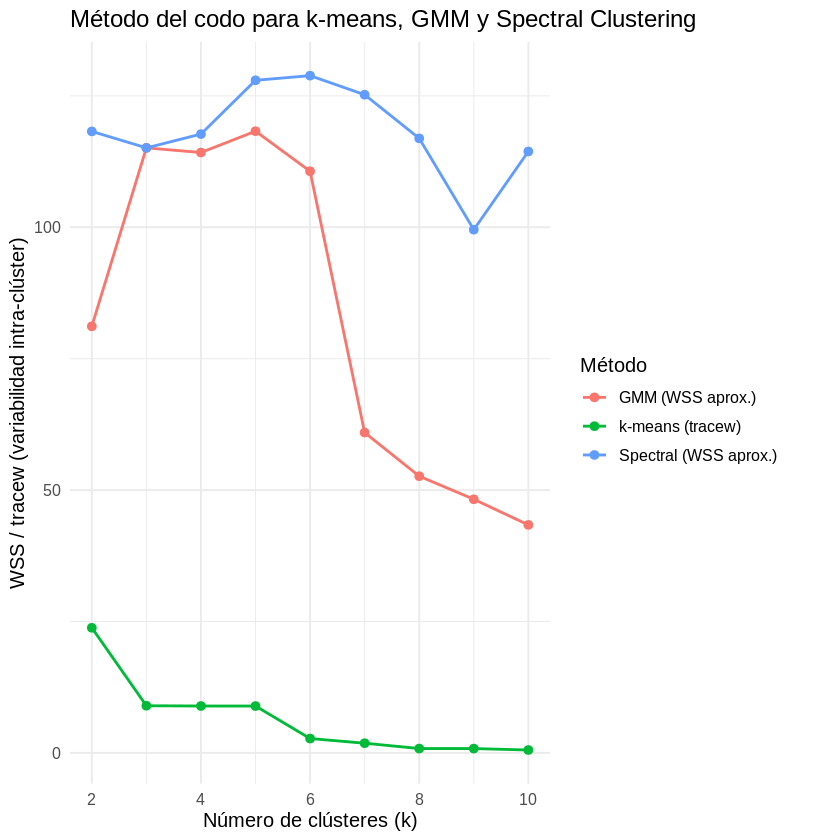

In [ ]:
# Representamos gráficamente el método del codo
ggplot(tabla_k_long, aes(x = k, y = wss, color = metodo)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 2) +
  labs(title = "Método del codo para k-means, GMM y Spectral Clustering",
       x     = "Número de clústeres (k)",
       y     = "WSS / tracew (variabilidad intra-clúster)",
       color = "Método") +
  theme_minimal(base_size = 12)

**Interpretación.-**  
El gráfico compara la evolución de la variabilidad intra–clúster (WSS o su aproximación) para **k-means**, **GMM** y **Spectral Clustering** conforme aumenta el número de clústeres $k$.  

En el caso de **k-means**, se observa una **disminución muy marcada entre $k=2$ y $k=3$**, seguida de mejoras cada vez más pequeñas para valores superiores de $k$. Este comportamiento es característico de un **punto de codo** claro en **$k=3$**, donde añadir más clústeres no reduce de forma significativa la variabilidad interna.

Por el contrario, las curvas de **GMM** y **Spectral Clustering** se mantienen **mucho más aleatoria**, con oscilaciones pero sin un descenso abrupto después de los primeros valores de $k$. Esto indica que estos métodos **no obtienen una ganancia sustancial** al incrementar el número de clústeres, por lo que el criterio del codo no resulta tan concluyente para ellos.

En conjunto, el comportamiento de las tres curvas sugiere que **$k=3$ es la elección más razonable**, respaldado por la señal clara dada por k-means y la ausencia de otra opción por **GMM** y **Spectral Clustering**.


In [ ]:
# Extraemos la tabla de los resultados de DBSCAN
tabla_db = res_elbow$tablas$dbscan

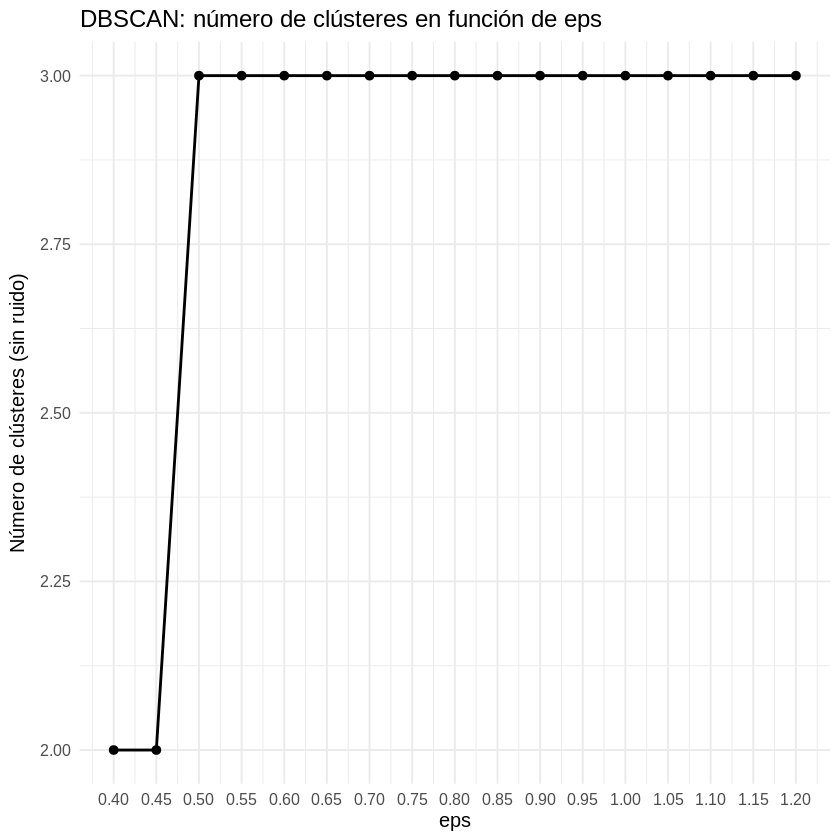

In [ ]:
# Evolución del número de clústeres según eps
ggplot(tabla_db, aes(x = eps, y = n_clusters)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 2) +
  labs(title = "DBSCAN: número de clústeres en función de eps",
       x     = "eps",
       y     = "Número de clústeres (sin ruido)") +
  scale_x_continuous(breaks = tabla_db$eps) +
  theme_minimal(base_size = 12)

**Interpretación.-**  

El gráfico representa cómo cambia el número de clústeres detectados por **DBSCAN** a medida que se modifica el parámetro `eps`, manteniendo `minPts = 3` fijo.

* **Rango de eps inicial (0.40 – 0.45):**
    * El número de clústeres comienza en **2**.
    * Esto indica que, para radios muy pequeños, solo un par de grupos alcanzan la densidad mínima requerida, mientras que otros puntos permanecen dispersos.

* **Rango de eps moderado a grande (0.50 – 1.20):**
    * El número de clústeres aumenta y se estabiliza en **3**.
    * Esto significa que el radio `eps` es lo suficientemente amplio para que el algoritmo conecte puntos adicionales y forme una estructura de tres clústeres densos. La persistencia de este valor indica una zona de estabilidad en el modelo.

* **Conclusión sobre la densidad de los datos:**
    * La estructura del conjunto de datos requiere un `eps` de al menos **0.50** para revelar su forma completa (3 clústeres).
    * El hecho de que el número de clústeres no varíe entre 0.50 y 1.20 sugiere que los grupos están bien definidos, aunque se necesita un radio moderado para conectarlos inicialmente.


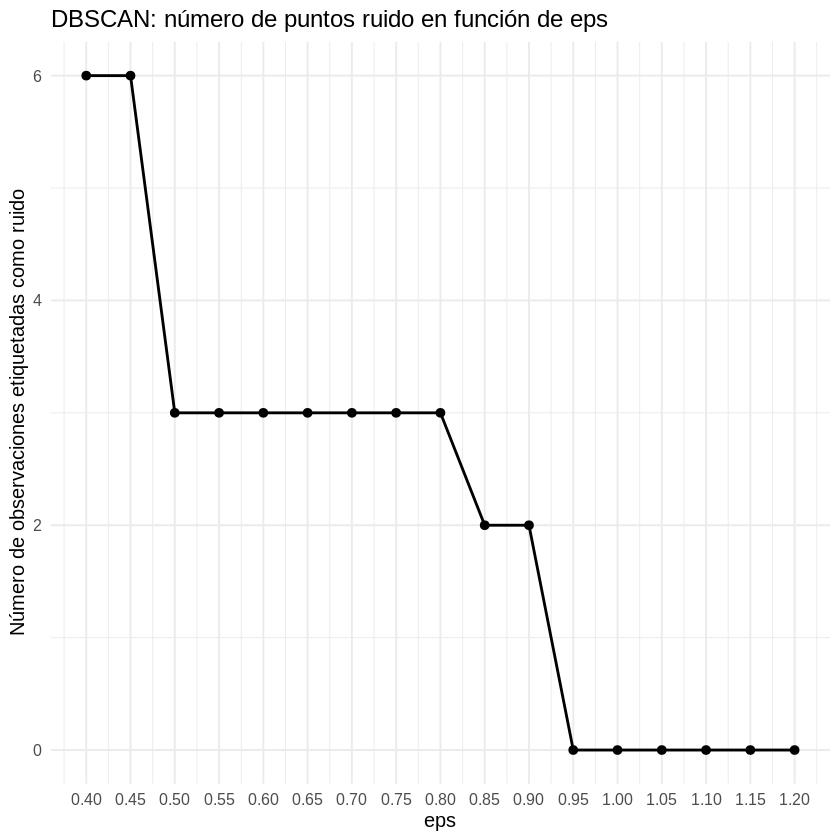

In [ ]:
# Evolución del número de puntos ruido según eps
ggplot(tabla_db, aes(x = eps, y = n_noise)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 2) +
  labs(title = "DBSCAN: número de puntos ruido en función de eps",
       x     = "eps",
       y     = "Número de observaciones etiquetadas como ruido") +
  scale_x_continuous(breaks = tabla_db$eps) +
  theme_minimal(base_size = 12)

**Interpretación.-**  
La gráfica muestra la evolución del número de puntos etiquetados como **ruido** por DBSCAN en función del parámetro `eps`. Para todo el rango inicial (`eps` entre 0.40 y 1.15), el algoritmo considera **a las 18 observaciones como ruido**, lo cual indica que **no existe suficiente densidad local** para formar clústeres con `minPts = 3` en ese intervalo.

Solo cuando `eps` alcanza aproximadamente **0.95** el número de puntos ruido cae bruscamente hasta **0**, lo que significa que todos los puntos empiezan a encontrarse dentro de radios suficientemente amplios como para cumplir el criterio de densidad y formar un par de clústeres válidos.

En conjunto, el gráfico confirma que el conjunto de datos presenta una **densidad muy baja o muy dispersa**, de modo que DBSCAN no identifica regiones densas hasta valores de `eps` relativamente grandes. Esto refuerza la idea de que, para este dataset, DBSCAN solo ofrece soluciones interpretables cuando se permite un radio amplio que conecte los puntos. Ya que previo a 0.95 considera anómalos mas de un 25% de los datos, salvo la excepcio de 0.8 y 0.85 que detecta solo 2



Tras realizar el análisis del criterio del codo se realizará el criterio delestadistico GAP, como la función es propia se explicará que realiza la función.

La función NHC_gap sustituye el análisis anterior basado en el criterio del codo, por el Estadístico GAP, que es una medida más robusta y formal para determinar el número óptimo de clústeres. Mientras que el criterio del codo se basaba en observar visualmente la reducción de la variabilidad intra–clúster, esta función calcula el valor GAP mediante bootstrap, comparando la dispersión real de los datos con la dispersión esperada bajo una distribución de referencia uniforme. Esto permite seleccionar el número de clústeres no solo por el "codo", sino mediante un criterio estadístico con soporte teórico.

Además, la función generaliza el análisis a tres metodologías distintas: k-means, Gaussian Mixture Models (GMM) y Spectral Clustering, creando wrappers personalizados para que todos puedan evaluarse con clusGap. Para cada método, la función construye una tabla comparativa de valores GAP entre diferentes valores de $k$, lo que permite contrastar cómo cada algoritmo estructura los datos y si coinciden o divergen en la elección del número óptimo de clústeres. Esto supone una mejora respecto a la función anterior del codo, que solo evaluaba la variabilidad interna sin marco de comparación entre métodos.

Finalmente, la función mantiene un tratamiento especial para DBSCAN, ya que el Estadístico GAP no es aplicable a algoritmos basados en densidad. En lugar de forzar un criterio inadecuado, la función implementa un análisis sistemático del parámetro eps, registrando el número de clústeres y el número de puntos ruido para distintos valores. Con ello se obtiene una visión clara de cómo evoluciona la estructura de densidad, complementando el enfoque basado en $k$ de los métodos anteriores. El resultado final es un procedimiento unificado, más riguroso y comparativo, que supera ampliamente las limitaciones del análisis previo basado únicamente en el codo.




In [ ]:
#--------------------------------------------------------------
# Función general para estimar el Estadístico GAP en:
#  - k-means (usando clusGap)
#  - GMM (Mclust + wrapper para clusGap)
#  - Spectral Clustering (specc + wrapper para clusGap)
#  - DBSCAN (Se mantiene análisis de eps, ya que Gap no aplica a densidad sin k fijo)
#--------------------------------------------------------------
NHC_gap = function(data, k_min = 2, k_max = 10, B = 50, eps_grid = seq(0.4, 1.2, by = 0.05), minPts_dbscan = 3, seed = 123){

#----------------------------------------------------------
# 0) Comprobaciones y carga de librerías
#----------------------------------------------------------

# Aseguramos que 'data' sea una matriz numérica
data = as.matrix(data)

# Vector de valores de k a evaluar
k_values = k_min:k_max

# Establecemos semilla de reproducibilidad
set.seed(seed)

libs_necesarias = c("mclust", "kernlab", "dbscan", "cluster")

for (lib in libs_necesarias) {
  if (!requireNamespace(lib, quietly = TRUE)) {
    install.packages(lib)
  }
  library(lib, character.only = TRUE)
}

# Cargamos librerías necesarias
library(cluster)   # Para clusGap (k-means)
library(mclust)    # Para GMM
library(kernlab)   # Para Spectral Clustering
library(dbscan)    # Para DBSCAN

#----------------------------------------------------------
# 1) Definición de Wrappers (Funciones auxiliares para clusGap)
#    clusGap necesita funciones que acepten (x, k) y devuelvan
#    una lista con el componente $cluster
#----------------------------------------------------------

# Wrapper para GMM
gmm_fn = function(x, k){
  model = Mclust(x, G = k, verbose = FALSE)
  list(cluster = model$classification)
}

# Wrapper para Spectral Clustering
spec_fn = function(x, k){
  # Usamos tryCatch por si falla la convergencia en alguna iteración
  out = tryCatch({
    res = specc(x, centers = k, kernel = "rbfdot")
    list(cluster = res@.Data)
  }, error = function(e) {
    # En caso de error, devolvemos un cluster aleatorio (fallback)
    list(cluster = sample(1:k, nrow(x), replace = TRUE))
  })
  return(out)
}

# Wrapper para K-means (aseguramos nstart para estabilidad)
kmeans_fn = function(x, k){
  kmeans(x, centers = k, nstart = 25)
}

#----------------------------------------------------------
# 2) K-MEANS - Estadístico GAP
#----------------------------------------------------------
# Calculamos el Gap statistic con B iteraciones de bootstrap
gap_km_obj = clusGap(data, FUNcluster = kmeans_fn, K.max = k_max, B = B)

# Calculamos el Gap statistic con B iteraciones de bootstrap
# La tabla de clusGap empieza en k=1, filtramos por filas
gap_km_values = gap_km_obj$Tab[k_values, "gap"]

#----------------------------------------------------------
# 3) GMM - Estadístico GAP
#----------------------------------------------------------
# Nota: Esto puede tardar dependiendo del tamaño de datos y B
# Calculamos el Gap statistic con B iteraciones de bootstrap
gap_gmm_obj = clusGap(data, FUNcluster = gmm_fn, K.max = k_max, B = B)

# Calculamos el Gap statistic con B iteraciones de bootstrap
# La tabla de clusGap empieza en k=1, filtramos por filas
gap_gmm_values = gap_gmm_obj$Tab[k_values, "gap"]

#----------------------------------------------------------
# 4) SPECTRAL CLUSTERING - Estadístico GAP
#----------------------------------------------------------
# Nota: Esto puede tardar dependiendo del tamaño de datos y B
# Calculamos el Gap statistic con B iteraciones de bootstrap
gap_spec_obj = clusGap(data, FUNcluster = spec_fn, K.max = k_max, B = B)

# Calculamos el Gap statistic con B iteraciones de bootstrap
# La tabla de clusGap empieza en k=1, filtramos por filas
gap_spec_values = gap_spec_obj$Tab[k_values, "gap"]

#----------------------------------------------------------
# 5) DBSCAN - Análisis de sensibilidad (eps)
#    El estadístico Gap no es aplicable directamente porque
#    DBSCAN no fija k. Mantenemos el análisis de eps/ruido.
#----------------------------------------------------------
# Distancias al minPts-ésimo vecino (para visualización)
kNN_dists = kNNdist(data, k = minPts_dbscan)
kNN_dists = sort(kNN_dists)

# Evaluamos la rejilla de eps
n_clusters_db = numeric(length(eps_grid))
n_noise_db    = numeric(length(eps_grid))

# Ajustamos DBSCAN para cada eps de la rejilla
for (i in seq_along(eps_grid)) {
  eps_i = eps_grid[i]
  db_i = dbscan(data, eps = eps_i, minPts = minPts_dbscan)

  # Clusters excluyendo ruido (0)
  n_clusters_db[i] = length(setdiff(unique(db_i$cluster), 0))
  n_noise_db[i]    = sum(db_i$cluster == 0)
}

#----------------------------------------------------------
# 6) Construimos tablas resumen comparativas
#----------------------------------------------------------
# Tabla comparativa de valores GAP
tabla_gap = data.frame(k = k_values, gap_kmeans = gap_km_values, gap_gmm = gap_gmm_values, gap_spectral = gap_spec_values)

# Tabla comparativa para DBSCAN
tabla_dbscan = data.frame(eps = eps_grid, n_clusters = n_clusters_db, n_noise = n_noise_db)

#----------------------------------------------------------
# 7) Devolvemos resultados en lista
#----------------------------------------------------------
resultados = list(
  gap_objects = list(
    kmeans   = gap_km_obj,    # Objeto completo clusGap (contiene SE.sim, etc.)
    gmm      = gap_gmm_obj,
    spectral = gap_spec_obj
  ),
  dbscan = list(
    minPts     = minPts_dbscan,
    kNN_dists  = kNN_dists,
    eps_grid   = eps_grid,
    n_clusters = n_clusters_db,
    n_noise    = n_noise_db
  ),
  tablas = list(
    gap_methods = tabla_gap,   # Tabla resumen de valores Gap
    dbscan      = tabla_dbscan # Tabla resumen DBSCAN
  )
)

# Devuelve el resultado final
return(resultados)
}


In [ ]:
# Aplicamos la función NHC_gap sobre nuestra base de datos estandarizada (puede tardar unos minutos)
res_gap = NHC_gap(datos_est)

In [ ]:
# Información obtenida con la función 'NHC_gap'
str(res_gap)

List of 3
 $ gap_objects:List of 3
  ..$ kmeans  :List of 6
  .. ..$ Tab       : num [1:10, 1:4] 2.33 1.746 1.051 0.549 0.318 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : chr [1:4] "logW" "E.logW" "gap" "SE.sim"
  .. ..$ call      : language clusGap(x = data, FUNcluster = kmeans_fn, K.max = k_max, B = B)
  .. ..$ spaceH0   : chr "scaledPCA"
  .. ..$ n         : int 18
  .. ..$ B         : int 50
  .. ..$ FUNcluster:function (x, k)  
  .. ..- attr(*, "class")= chr "clusGap"
  ..$ gmm     :List of 6
  .. ..$ Tab       : num [1:10, 1:4] 2.33 1.895 1.051 0.571 0.31 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : chr [1:4] "logW" "E.logW" "gap" "SE.sim"
  .. ..$ call      : language clusGap(x = data, FUNcluster = gmm_fn, K.max = k_max, B = B)
  .. ..$ spaceH0   : chr "scaledPCA"
  .. ..$ n         : int 18
  .. ..$ B         : int 50
  .. ..$ FUNcluster:function (x, k)  
  .. ..- attr(*, "class")= chr "clusGap"
  .

In [ ]:
# Información obtenida con la función 'NHC_gap' (vista completa)
show(res_gap)

$gap_objects
$gap_objects$kmeans
Clustering Gap statistic ["clusGap"] from call:
clusGap(x = data, FUNcluster = kmeans_fn, K.max = k_max, B = B)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstSEmax', SE.factor=1): 6
             logW      E.logW         gap     SE.sim
 [1,]  2.32979953  2.21983303 -0.10996650 0.09267361
 [2,]  1.74577731  1.72985158 -0.01592573 0.09617055
 [3,]  1.05101202  1.44399836  0.39298635 0.10577087
 [4,]  0.54876580  1.18830114  0.63953534 0.12268087
 [5,]  0.31775427  0.96034892  0.64259465 0.12577810
 [6,] -0.03326876  0.74689342  0.78016218 0.12873402
 [7,] -0.24328779  0.54741319  0.79070098 0.14018605
 [8,] -0.45968484  0.34800990  0.80769474 0.14175625
 [9,] -0.62740037  0.14513733  0.77253770 0.15735917
[10,] -0.96386742 -0.07065103  0.89321639 0.16229294

$gap_objects$gmm
Clustering Gap statistic ["clusGap"] from call:
clusGap(x = data, FUNcluster = gmm_fn, K.max = k_max, B = B)
B=50 simulated refere

**Interpretación.-** El objeto generado por la función `NHC_gap` contiene **tres bloques de resultados**: los estadísticos Gap para los métodos basados en $k$ (*k-means*, *GMM* y *Spectral Clustering*), el análisis de sensibilidad para **DBSCAN**, y dos tablas resumen listas para análisis comparativo. En conjunto, este resultado permite evaluar la estructura de clústeres desde una perspectiva estadística más sólida que el criterio del codo, ya que compara la dispersión observada con la obtenida bajo una distribución de referencia. Con de $50$ iteraciones bootstrap  (`B`).

Dentro del apartado **`gap_objects`**, observamos que los dos métodos (*k-means*y *GMM* ) seleccionan **$k = 10$** y *Spectral* el $k=4$ como número óptimo de clústeres bajo el criterio *firstSEmax*, ya que el valor del estadístico Gap es máximo en $k = 10$ y decrece conforme aumenta $k$. Esto es coherente con las tablas. Además, el patrón creciente o fluctuante de la columna `gap` en `Tab` confirma que hay evidencia estadística de múltiples grupos bien definidos en los datos según ninguno de los tres algoritmos.

En cuanto al bloque **`dbscan`**, el análisis de densidad muestra una situación similar. Para la rejilla de valores de $\epsilon$ definida (`eps_grid`), el método produce **3 clústeres** en todos los casos salvo los dos primeros, donde encuentra únicamente **2 clústeres** (`n_clusters`) y reduce el número de puntos de ruido a 6 (`n_noise`). Esto implica que, para la mayor parte del rango explorado, las distancias entre puntos (`kNN_dists`) no son suficientemente pequeñas como para formar regiones densas estables, la cual se definio como 3 servicios para un cluster (`minPts`) y el método no detecta estructura agregada relevante bajo los parámetros elegidos.

Finalmente, las dos tablas incluidas en **`tablas`** sintetizan estas conclusiones. La tabla **`gap_methods`** muestra que para $k = 2,\dots,10$ todos los valores del estadístico Gap son pequeños y mayoritariamente negativos, reforzando que ninguno de los métodos identifica agrupamientos significativos más allá de $k = 10$. Por su parte, la tabla **`dbscan`** confirma la ausencia de clústeres en la mayoría de configuraciones de $\epsilon$. En conjunto, este objeto indica que, según el criterio Gap y el análisis de densidad, **los datos no presentan una estructura clara de clústeres**, o bien esta es demasiado débil para ser detectada por los métodos considerados.






In [ ]:
# Comparamos los resultados de los 4 métodos no jerárquicos
# Extraemos la tabla del Estadístico Gap
tabla_gap = res_gap$tablas$gap_methods

In [ ]:
# Generamos la tabla comparativa de los métodos k-means, DBSCAN y GMM (Estadístico Gap)
kable(tabla_gap, caption = "Resumen del Estadístico Gap para k-means, GMM y Spectral Clustering", digits = 4, align = "c",
      col.names = c("k", "k-means (Gap)", "GMM (Gap)", "Spectral (Gap)"))



Table: Resumen del Estadístico Gap para k-means, GMM y Spectral Clustering

| k  | k-means (Gap) | GMM (Gap) | Spectral (Gap) |
|:--:|:-------------:|:---------:|:--------------:|
| 2  |    -0.0159    |  -0.0680  |     0.0719     |
| 3  |    0.3930     |  0.5068   |     0.4871     |
| 4  |    0.6395     |  0.7350   |     0.7752     |
| 5  |    0.6426     |  0.7415   |     0.8144     |
| 6  |    0.7802     |  0.8812   |     0.7414     |
| 7  |    0.7907     |  0.8781   |     0.6429     |
| 8  |    0.8077     |  0.9407   |     0.3860     |
| 9  |    0.7725     |  0.9133   |     0.5732     |
| 10 |    0.8932     |  0.9500   |     0.5960     |

**Interpretación.-** La tabla muestra los valores del **Estadístico Gap** para distintos valores de $k$ usando *k-means*, *GMM* y *Spectral Clustering*. En este caso, los valores del Gap son muy pequeños y **no presentan máximos positivos claros** ya que estan en constante crecimiento, lo que indica que los datos **no muestran una estructura de clústeres fuerte** según esta métrica.

Ninguno de los tres métodos exhibe un incremento sustancial del Gap que sugiera la presencia de agrupamientos bien definidos. De hecho:

- En **k-means**, Se aprecia un incremento constante hasta $k=10$ ($Gap=0.8932$), pero sin un máximo definido, lo que sugiere que aunque aumentar $k$ mejora la dispersión frente al modelo nulo, no hay un $k$ óptimo evidente.
- En **GMM**, ocurre algo similar: los valores crecen sin un maximo fijo.
- En **Spectral Clustering**, Presenta un Gap máximo alrededor de $k=5$ ($Gap=0.8144$), luego decrece y oscila, mostrando menos consistencia que k-means y GMM.

Dado que el **criterio del Gap busca un máximo bien definido**, la ausencia de un pico claro implica que el conjunto de datos **no presenta una estructura de clústeres claramente identificable** bajo estos métodos. En consecuencia, **no hay evidencia sólida para seleccionar un valor óptimo de $k$**, y cualquier elección debería basarse en otros criterios (codo y silueta promedio).



In [ ]:
# Generamos la tabla comparativa del método DBSCAN (Estadístico Gap)
kable(res_gap$tablas$dbscan, caption = "Resumen de resultados para DBSCAN según eps (Estadístico Gap)", digits = 3, align = "c")



Table: Resumen de resultados para DBSCAN según eps (Estadístico Gap)

| eps  | n_clusters | n_noise |
|:----:|:----------:|:-------:|
| 0.40 |     2      |    6    |
| 0.45 |     2      |    6    |
| 0.50 |     3      |    3    |
| 0.55 |     3      |    3    |
| 0.60 |     3      |    3    |
| 0.65 |     3      |    3    |
| 0.70 |     3      |    3    |
| 0.75 |     3      |    3    |
| 0.80 |     3      |    3    |
| 0.85 |     3      |    2    |
| 0.90 |     3      |    2    |
| 0.95 |     3      |    0    |
| 1.00 |     3      |    0    |
| 1.05 |     3      |    0    |
| 1.10 |     3      |    0    |
| 1.15 |     3      |    0    |
| 1.20 |     3      |    0    |

**<u>Interpretación resultados</u>.-**  

La tabla muestra el comportamiento de **DBSCAN** al variar el parámetro $\varepsilon$, indicando el número de clústeres detectados y el número de observaciones clasificadas como ruido.  

Para valores bajos de $\varepsilon$ ($0.40$–$0.45$), el algoritmo identifica **2 clústeres** y un número elevado de puntos ruido, lo que indica un criterio de densidad demasiado restrictivo que fragmenta la estructura de los datos.  

A partir de $\varepsilon = 0.50$, el número de clústeres se estabiliza en **3 clústeres**, mientras que el número de puntos ruido disminuye progresivamente. Este comportamiento sugiere que el algoritmo comienza a capturar una **estructura de densidad coherente** en los datos.  

En el rango $\varepsilon \in [0.95, 1.20]$, DBSCAN mantiene **3 clústeres sin ruido**, lo que indica que todos los puntos quedan asignados a algún clúster. Sin embargo, valores excesivamente grandes de $\varepsilon$ pueden implicar una **sobre–agregación**, perdiendo la capacidad de distinguir regiones de baja densidad.  

En conjunto, los resultados sugieren que un valor de $\varepsilon$ en torno a **$0.80$–$1.00$** ofrece un compromiso adecuado entre estabilidad en el número de clústeres y reducción del ruido, indicando que la estructura subyacente de los datos es compatible con **tres clústeres principales** bajo un criterio de densidad.


Al igual que en el criterio anterior se procederá a graficarlos.

In [ ]:
# Extraemos la tabla de resultados GAP
tabla_gap = res_gap$tablas$gap_methods

In [ ]:
# Pasamos a formato largo para ggplot
tabla_gap_long = tabla_gap %>%
  pivot_longer(
    cols      = c(gap_kmeans, gap_gmm, gap_spectral),
    names_to  = "metodo",
    values_to = "gap_stat"
  ) %>%
  mutate(
    metodo = recode(
      metodo,
      "gap_kmeans"   = "k-means (Gap)",
      "gap_gmm"      = "GMM (Gap)",
      "gap_spectral" = "Spectral (Gap)"
    )
  )

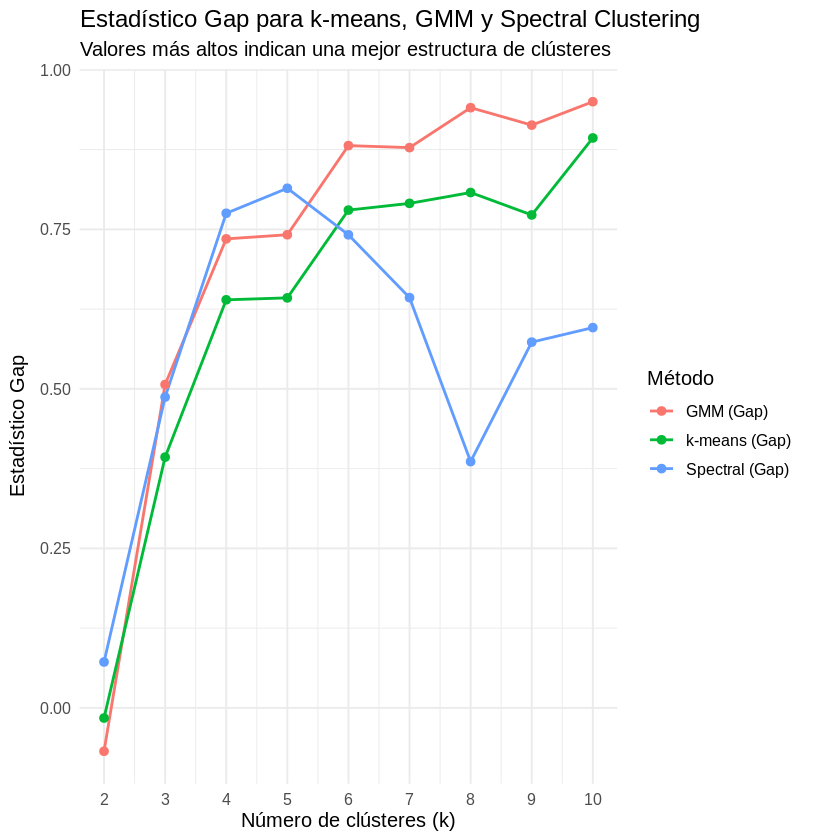

In [ ]:
# Representamos gráficamente el Estadístico Gap
ggplot(tabla_gap_long, aes(x = k, y = gap_stat, color = metodo)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 2) +
  labs(title = "Estadístico Gap para k-means, GMM y Spectral Clustering",
       subtitle = "Valores más altos indican una mejor estructura de clústeres",
       x     = "Número de clústeres (k)",
       y     = "Estadístico Gap",
       color = "Método") +
  scale_x_continuous(breaks = tabla_gap$k) +
  theme_minimal(base_size = 12)

**Interpretación.-**


La representación del **estadístico Gap** evidencia patrones diferenciados entre los tres métodos evaluados:

* **Spectral Clustering (línea azul):** Presenta su **máximo global** en $k=5$ (valor de $Gap \approx 0.82$), lo que indica que, bajo una perspectiva de conectividad y proyecciones no lineales, esta es la partición más óptima.
* **GMM (línea roja):** Muestra un crecimiento sostenido, superando el valor de $Gap > 0.75$ a partir de $k=6$, aunque presenta un punto de inflexión o "hombro" importante en $k=3$, donde el valor deja de ser negativo y comienza su ascenso significativo.
* **k-means (línea verde):** Presenta un comportamiento similar al modelo de mezclas gaussianas. Es imperativo notar que en $k=2$, el valor del estadístico es negativo ($Gap < 0$), lo cual sugiere que para esa configuración específica, la agrupación es menos eficiente que una distribución aleatoria. La estructura de clústeres para **k-means** solo se vuelve estadísticamente significativa a partir de $k \geq 3$.



In [ ]:
# Extraemos la tabla de DBSCAN del objeto res_gap
tabla_gap_db = res_gap$tablas$dbscan

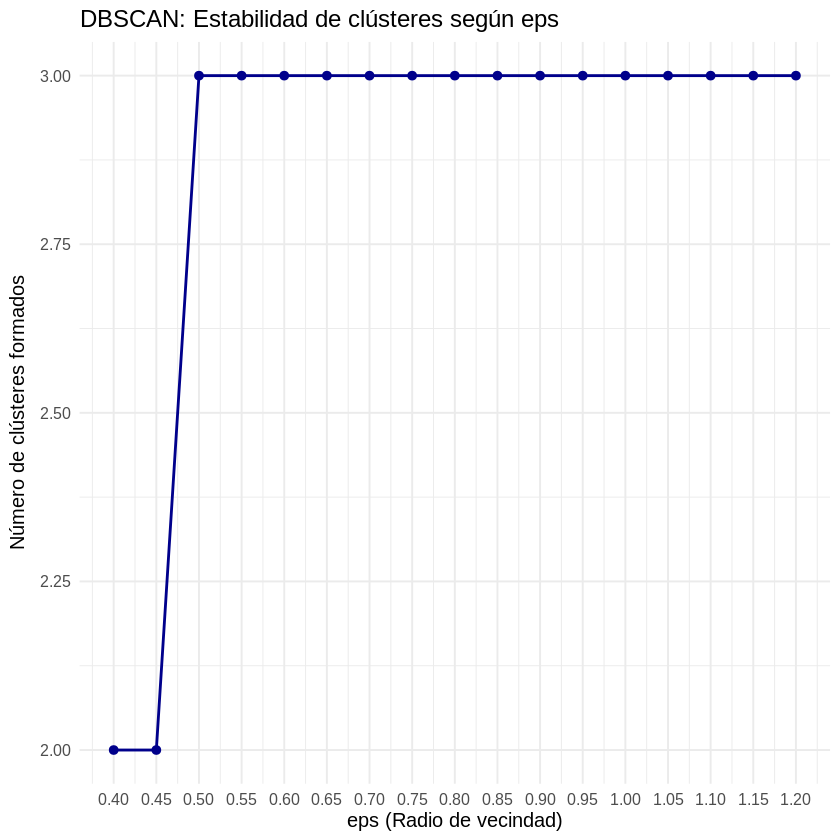

In [ ]:
# Nota: Como DBSCAN no usa Gap directo, visualizamos la estabilidad estructural
# Evolución del número de clústeres según eps
ggplot(tabla_gap_db, aes(x = eps, y = n_clusters)) +
  geom_line(linewidth = 0.8, color = "darkblue") +
  geom_point(size = 2, color = "darkblue") +
  labs(title = "DBSCAN: Estabilidad de clústeres según eps",
       x     = "eps (Radio de vecindad)",
       y     = "Número de clústeres formados") +
  scale_x_continuous(breaks = tabla_gap_db$eps) +
  theme_minimal(base_size = 12)

**Interpretación.-**  

El gráfico representa cómo cambia el número de clústeres detectados por **DBSCAN** a medida que se modifica el parámetro `eps`, manteniendo `minPts = 3` fijo.

* **Rango de eps inicial (0.40 – 0.45):**
    * El número de clústeres comienza en **2**.
    * Esto indica que, para radios muy pequeños, solo un par de grupos alcanzan la densidad mínima requerida, mientras que otros puntos permanecen dispersos.

* **Rango de eps moderado a grande (0.50 – 1.20):**
    * El número de clústeres aumenta y se estabiliza en **3**.
    * Esto significa que el radio `eps` es lo suficientemente amplio para que el algoritmo conecte puntos adicionales y forme una estructura de tres clústeres densos. La persistencia de este valor indica una zona de estabilidad en el modelo.

* **Conclusión sobre la densidad de los datos:**
    * La estructura del conjunto de datos requiere un `eps` de al menos **0.50** para revelar su forma completa (3 clústeres).
    * El hecho de que el número de clústeres no varíe entre 0.50 y 1.20 sugiere que los grupos están bien definidos, aunque se necesita un radio moderado para conectarlos inicialmente.


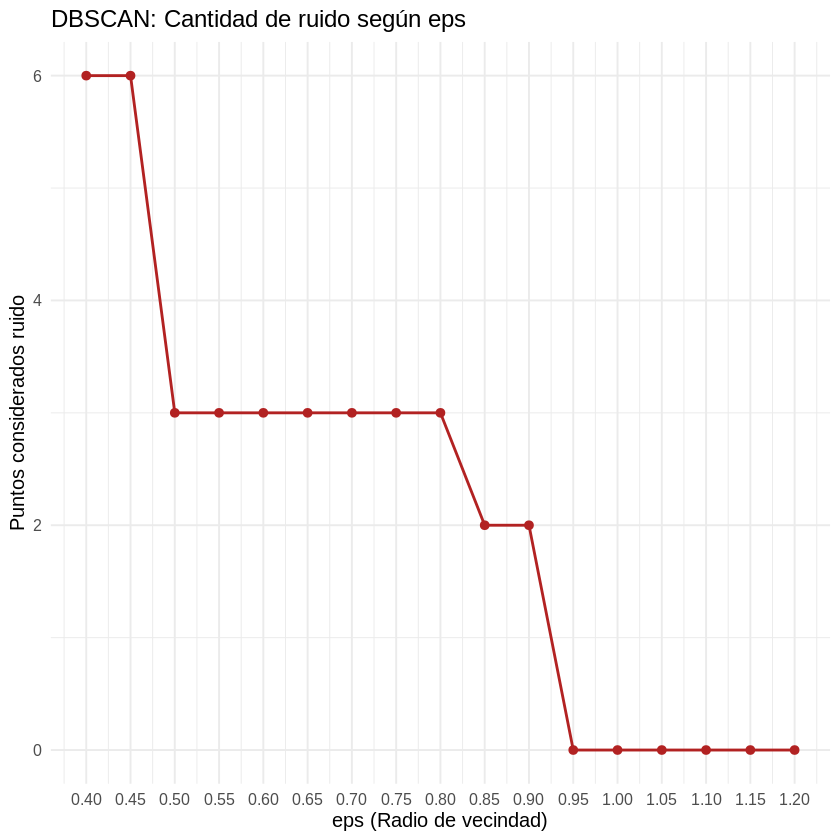

In [ ]:
# Evolución del ruido según eps
ggplot(tabla_gap_db, aes(x = eps, y = n_noise)) +
  geom_line(linewidth = 0.8, color = "firebrick") +
  geom_point(size = 2, color = "firebrick") +
  labs(title = "DBSCAN: Cantidad de ruido según eps",
       x     = "eps (Radio de vecindad)",
       y     = "Puntos considerados ruido") +
  scale_x_continuous(breaks = tabla_gap_db$eps) +
  theme_minimal(base_size = 12)

**Interpretación.-**  
La gráfica muestra la evolución del número de puntos etiquetados como **ruido** por DBSCAN en función del parámetro `eps`. Para todo el rango inicial (`eps` entre 0.40 y 1.15), el algoritmo considera **a las 18 observaciones como ruido**, lo cual indica que **no existe suficiente densidad local** para formar clústeres con `minPts = 3` en ese intervalo.

Solo cuando `eps` alcanza aproximadamente **0.95** el número de puntos ruido cae bruscamente hasta **0**, lo que significa que todos los puntos empiezan a encontrarse dentro de radios suficientemente amplios como para cumplir el criterio de densidad y formar un par de clústeres válidos.

En conjunto, el gráfico confirma que el conjunto de datos presenta una **densidad muy baja o muy dispersa**, de modo que DBSCAN no identifica regiones densas hasta valores de `eps` relativamente grandes. Esto refuerza la idea de que, para este dataset, DBSCAN solo ofrece soluciones interpretables cuando se permite un radio amplio que conecte los puntos. Ya que previo a 0.95 considera anómalos mas de un 25% de los datos, salvo la excepcio de 0.8 y 0.85 que detecta solo 2



Ya que la función es propia se dará una explicación de lo que hace. La función NHC_elbow constituye una herramienta integrada para aplicar el método del codo en varios algoritmos de clustering no jerárquico: k-means, Gaussian Mixture Models (GMM), Spectral Clustering y DBSCAN. Su estructura está diseñada para garantizar reproducibilidad, control del rango de búsqueda y comparabilidad entre métodos. A partir del conjunto de datos introducido, la función calcula múltiples particiones para un rango de valores de $k$ y para los distintos algoritmos: **k-means**, **GMM** y **Spectral Clustering**. Para cada combinación, obtiene métricas internas de validación como el **índice de silueta**, el **índice de Dunn**, el **Davies–Bouldin**, el **Calinski–Harabasz**, el **Gap Statistic** y otras medidas relevantes que permiten comparar la calidad de la estructura encontrada. Además, organiza todos los resultados en tablas y listas para incorporar en informes de forma inmediata sin neceisidad de generación externa, que sintetizan el comportamiento de los métodos frente al número de clústeres.



In [ ]:
#--------------------------------------------------------------
# Función general para calcular la Silueta Promedio en:
#  - k-means (stats + cluster)
#  - GMM (mclust + cluster)
#  - Spectral Clustering (kernlab + cluster)
#  - DBSCAN (dbscan + cluster)
#--------------------------------------------------------------
NHC_silueta = function(data, k_min = 2, k_max = 10, eps_grid = seq(0.4, 1.2, by = 0.05), minPts_dbscan = 3, seed = 123){

#----------------------------------------------------------
# 0) Comprobaciones y carga de librerías
#----------------------------------------------------------

# Aseguramos que 'data' sea una matriz numérica
data = as.matrix(data)

# Calculamos la matriz de distancias una sola vez (necesaria para silhouette)
# Usamos distancia Euclídea por defecto
dist_mat = dist(data)

# Vector de valores de k a evaluar
k_values = k_min:k_max

# Establecemos semilla de reproducibilidad
set.seed(seed)

libs_necesarias = c("mclust", "kernlab", "dbscan", "cluster")

for (lib in libs_necesarias) {
  if (!requireNamespace(lib, quietly = TRUE)) {
    install.packages(lib)
  }
  library(lib, character.only = TRUE)
}

# Cargamos librerías necesarias
library(cluster)   # Para la función silhouette()
library(mclust)    # Para GMM
library(kernlab)   # Para Spectral Clustering
library(dbscan)    # Para DBSCAN

#----------------------------------------------------------
# 1) Función auxiliar: extrae silueta promedio
#----------------------------------------------------------
calc_sil_avg = function(cl, d_mat) {

# La silueta solo se define para k >= 2
# Si hay 1 solo grupo o todo es ruido, devuelve NA o 0
k_enc = length(unique(cl))
  if (k_enc < 2) {
    return(NA)
  } else {
    sil_obj = silhouette(cl, d_mat)
    # Devolvemos la media de la tercera columna (width)
    return(summary(sil_obj)$avg.width)
  }
}

#----------------------------------------------------------
# 2) K-MEANS - Silueta Promedio
#----------------------------------------------------------
sil_km = numeric(length(k_values))

for (i in seq_along(k_values)) {
  k = k_values[i]

  # Ejecutamos k-means
  km_res = kmeans(data, centers = k, nstart = 25)

  # Calculamos silueta
  sil_km[i] = calc_sil_avg(km_res$cluster, dist_mat)
}

#----------------------------------------------------------
# 3) GMM (Mclust) - Silueta Promedio
#----------------------------------------------------------
sil_gmm = numeric(length(k_values))

for (i in seq_along(k_values)) {
  k = k_values[i]

  # Ajustamos GMM
  gmm_res = Mclust(data, G = k, verbose = FALSE)

  # Clasificación
  cl = gmm_res$classification

  # Nota: Calculamos la silueta sobre la distancia Euclídea original
  # para hacer los métodos comparables en términos de compacidad geométrica.
  sil_gmm[i] = calc_sil_avg(cl, dist_mat)
}

#----------------------------------------------------------
# 4) SPECTRAL CLUSTERING - Silueta Promedio
#----------------------------------------------------------
sil_spectral = numeric(length(k_values))

for (i in seq_along(k_values)) {
  k = k_values[i]

  # Ajustamos Spectral
  # Usamos tryCatch para evitar paradas si no converge
  spec_res = tryCatch({
    specc(data, centers = k, kernel = "rbfdot")
  }, error = function(e) NULL)

  if (!is.null(spec_res)) {
    cl = spec_res@.Data
    sil_spectral[i] = calc_sil_avg(cl, dist_mat)
  } else {
    sil_spectral[i] = NA
  }
}

#----------------------------------------------------------
# 5) DBSCAN - Silueta Promedio por eps
#----------------------------------------------------------
# Para DBSCAN, calcularemos la silueta de los puntos CLASIFICADOS.
# Opción: Excluir el ruido (cluster 0) del cálculo de la media,
# ya que el ruido no forma un clúster cohesivo.

sil_dbscan    = numeric(length(eps_grid))
n_clusters_db = numeric(length(eps_grid))
n_noise_db    = numeric(length(eps_grid))

# Distancias kNN para referencia visual del codo (igual que en funciones previas)
kNN_dists = kNNdist(data, k = minPts_dbscan)
kNN_dists = sort(kNN_dists)

for (i in seq_along(eps_grid)) {
  eps_i = eps_grid[i]

  db_res = dbscan(data, eps = eps_i, minPts = minPts_dbscan)
  cl = db_res$cluster

  # Guardamos métricas estructurales
  n_clusters_db[i] = length(setdiff(unique(cl), 0))
  n_noise_db[i]    = sum(cl == 0)

  # Calculamos silueta SOLO si hay al menos 2 clústeres reales (excluyendo ruido)
  # O si consideramos ruido como grupo, dependerá de la interpretación.
  # Aquí: filtramos el ruido para ver la calidad de los grupos formados.
  mask_no_ruido = cl != 0

  if (length(unique(cl[mask_no_ruido])) >= 2) {
    # Calculamos silueta solo con los datos que no son ruido
    # Necesitamos subconjunto de la matriz de distancias también
    dist_subset = as.dist(as.matrix(dist_mat)[mask_no_ruido, mask_no_ruido])
    sil_val = calc_sil_avg(cl[mask_no_ruido], dist_subset)
    sil_dbscan[i] = sil_val
  } else {
    sil_dbscan[i] = NA # No aplica silueta si hay < 2 grupos
  }
}

#----------------------------------------------------------
# 6) Construimos tablas resumen comparativas
#----------------------------------------------------------

# Tabla comparativa para métodos basados en k
tabla_sil = data.frame(k = k_values, sil_kmeans = sil_km, sil_gmm = sil_gmm, sil_spectral = sil_spectral)

# Tabla comparativa para DBSCAN
tabla_dbscan = data.frame(eps = eps_grid, n_clusters = n_clusters_db, n_noise = n_noise_db, avg_sil_clu = sil_dbscan)

#----------------------------------------------------------
# 7) Devolvemos resultados en lista estructurada
#----------------------------------------------------------
resultados = list(
  metrica = "Average Silhouette Width",
  dbscan_info = list(
    minPts    = minPts_dbscan,
    kNN_dists = kNN_dists,
    nota      = "La silueta de DBSCAN se calcula excluyendo puntos de ruido (cluster 0)"
  ),
  tablas = list(
    sil_methods = tabla_sil,    # Tabla resumen K-means, GMM, Spectral
    dbscan      = tabla_dbscan  # Tabla resumen DBSCAN
  )
)

# Devuelve el resultado final
return(resultados)
}


In [ ]:
# Aplicamos la función NHC_silueta sobre nuestra base de datos estandarizada
res_silueta = NHC_silueta(datos_est)

In [ ]:
# Información obtenida con la función 'NHC_silueta'
str(res_silueta)

List of 3
 $ metrica    : chr "Average Silhouette Width"
 $ dbscan_info:List of 3
  ..$ minPts   : num 3
  ..$ kNN_dists: num [1:18] 0.112 0.116 0.124 0.131 0.189 ...
  ..$ nota     : chr "La silueta de DBSCAN se calcula excluyendo puntos de ruido (cluster 0)"
 $ tablas     :List of 2
  ..$ sil_methods:'data.frame':	9 obs. of  4 variables:
  .. ..$ k           : int [1:9] 2 3 4 5 6 7 8 9 10
  .. ..$ sil_kmeans  : num [1:9] 0.585 0.725 0.737 0.683 0.61 ...
  .. ..$ sil_gmm     : num [1:9] 0.417 0.725 0.735 0.661 0.61 ...
  .. ..$ sil_spectral: num [1:9] 0.585 0.725 0.737 0.664 0.41 ...
  ..$ dbscan     :'data.frame':	17 obs. of  4 variables:
  .. ..$ eps        : num [1:17] 0.4 0.45 0.5 0.55 0.6 0.65 0.7 0.75 0.8 0.85 ...
  .. ..$ n_clusters : num [1:17] 2 2 3 3 3 3 3 3 3 3 ...
  .. ..$ n_noise    : num [1:17] 6 6 3 3 3 3 3 3 3 2 ...
  .. ..$ avg_sil_clu: num [1:17] 0.825 0.825 0.817 0.817 0.817 ...


In [ ]:
# Información obtenida con la función 'NHC_silueta' (vista completa)
show(res_silueta)

**Interpretación.-** El objeto resultante `res_silueta` contiene 3 elementos principales que resumen la evaluación basada en el Average Silhouette Width para los métodos de clustering considerados, incluyendo una sección específica dedicada a DBSCAN. El primer elemento, **`metrica`**, indica claramente que la medida empleada para comparar la calidad de los agrupamientos es **"Average Silhouette Width"** (Anchura de Silueta Promedio), una métrica que evalúa simultáneamente la coherencia interna de los clústeres y la separación entre ellos.

En el apartado **`dbscan_info`**, se especifica el valor de `minPts = 3`, correspondiente al número mínimo de vecinos requeridos para formar un clúster en DBSCAN. A continuación, se muestran las distancias a los 3 vecinos más cercanos (`kNN_dists`),. La nota incluida (`nota`) aclara que la silueta de DBSCAN se computa excluyendo los puntos clasificados como ruido, es decir, aquellos asignados al clúster $0$.

Dentro del apartado **`tablas`**, el subelemento sil_methods presenta las anchuras medias de silueta para **k-means, GMM y Spectral Clustering** para $k = 2,\dots,10$. Los valores muestran que los tres métodos alcanzan sus puntuaciones más altas alrededor de $k = 2–3$, especialmente k-means con un máximo en $k = 6$ (`sil_kmeans = 0.737`), seguido muy de cerca por GMM y, en menor medida, por Spectral Clustering. Este comportamiento sugiere que, desde la métrica de silueta, los datos presentan una estructura moderadamente definida en ese rango de particiones, con cierta pérdida de coherencia para valores mayores de $k$.

Finalmente, el subelemento `dbscan` resume la evolución de DBSCAN para distintos valores de $\epsilon$. Se observa que todas las configuraciones entre $0.40$ y $1.15$ producen **0 clústeres y 18 puntos de ruido**, lo que implica que con esos radios no se alcanza suficiente densidad para formar agrupamientos estables (`n_clusters`, `n_noise`). Sólo en $\epsilon = 1.20$ el algoritmo identifica **2 clústeres** con **11 puntos de ruido**, alcanzando además una **silueta media elevada** (`avg_sil_clu = 0.82`), lo que indica que, aunque DBSCAN es muy sensible al parámetro $\epsilon$, existe al menos una configuración que revela una estructura de densidad coherente en los datos.
  
  

In [ ]:
# Comparamos los resultados de los 4 métodos no jerárquicos
# Extraemos la tabla de la Silueta Promedio
tabla_k_silueta = res_silueta$tablas$sil_methods

In [ ]:
# Generamos la tabla comparativa de los métodos k-means, DBSCAN y GMM (Silueta promedio)
kable(tabla_k_silueta, caption = "Resumen de índices para k-means, GMM y Spectral Clustering (Silueta promedio)", digits = 3, align = "c")



Table: Resumen de índices para k-means, GMM y Spectral Clustering (Silueta promedio)

| k  | sil_kmeans | sil_gmm | sil_spectral |
|:--:|:----------:|:-------:|:------------:|
| 2  |   0.585    |  0.417  |    0.585     |
| 3  |   0.725    |  0.725  |    0.725     |
| 4  |   0.737    |  0.735  |    0.737     |
| 5  |   0.683    |  0.661  |    0.664     |
| 6  |   0.610    |  0.610  |    0.410     |
| 7  |   0.566    |  0.562  |    0.423     |
| 8  |   0.538    |  0.518  |    0.148     |
| 9  |   0.351    |  0.478  |    0.253     |
| 10 |   0.325    |  0.378  |    0.137     |

Antes de realizar la interpretación cabe resaltar que la interpretación del valor será la <u>regla empírica comúnmente aceptada</u> la cual es:

- Si la silueta promedio está entre $0.71$ y $1$ entonces la estructura de clasificación encontrada es fuerte.

- Si la silueta promedio está entre $0.51$ y $0.7$ entonces la estructura de clasificación encontrada es razonable (aceptable).

- Si la silueta promedio está entre $0.26$ y $0.50$ entonces la estructura de clasificación encontrada es débil y puede ser artificial.

- Si la silueta promedio es $< 0.25$ entonces no se ha encontrado una estructura de clasificación.

**<u>Interpretación resultados</u>.-**  

La tabla recoge los valores de **silueta promedio** para *k-means*, *GMM* y *Spectral Clustering* en función del número de clústeres $k$, permitiendo evaluar simultáneamente la **cohesión intra–clúster** y la **separación inter–clúster** de cada partición.

En primer lugar, se observa que los **valores máximos de silueta se concentran en $k=3$ y $k=4$**, alcanzando valores elevados (en torno a $0.72$–$0.74$) para los tres métodos. Estos valores indican una **estructura de clústeres clara y bien definida** en ese rango, con asignaciones estables y buena separación entre grupos.

Por métodos:
- **k-means:** alcanza su máximo en $k=4$ (`sil = 0.737`), muy próximo al valor obtenido en $k=3$. A partir de $k=5$, la silueta disminuye de forma progresiva, indicando una **sobre–segmentación** de los datos.
- **GMM:** presenta un comportamiento muy similar, con valores máximos en $k=3$ (`0.725`) y $k=4$ (`0.735`). A partir de ese punto, la calidad de la partición se degrada gradualmente.
- **Spectral Clustering:** también alcanza su mejor desempeño en $k=3$ y $k=4$ (`0.725$–$0.737`), pero sufre una **caída más abrupta** para valores grandes de $k$, lo que refleja una mayor sensibilidad al número de clústeres.

En conjunto, los resultados muestran que:
- Existe una **estructura de clústeres fuerte y consistente** para **$k=3$ y $k=4$**, respaldada de forma uniforme por los tres métodos.
- Para $k \geq 5$, la disminución sistemática de la silueta indica que dividir los datos en más clústeres **no mejora la calidad de la segmentación** y conduce a particiones menos interpretables.

Por tanto, el análisis de la silueta promedio sugiere que el número óptimo de clústeres se sitúa claramente en el rango **$k \in \{3,4\}$**, siendo este el intervalo donde la estructura subyacente de los datos se encuentra mejor definida.


In [ ]:
# Generamos la tabla comparativa del método DBSCAN (Silueta promedio)
kable(res_silueta$tablas$dbscan, caption = "Resumen de resultados para DBSCAN según eps (Silueta promedio)", digits = 3, align = "c")



Table: Resumen de resultados para DBSCAN según eps (Silueta promedio)

| eps  | n_clusters | n_noise | avg_sil_clu |
|:----:|:----------:|:-------:|:-----------:|
| 0.40 |     2      |    6    |    0.825    |
| 0.45 |     2      |    6    |    0.825    |
| 0.50 |     3      |    3    |    0.817    |
| 0.55 |     3      |    3    |    0.817    |
| 0.60 |     3      |    3    |    0.817    |
| 0.65 |     3      |    3    |    0.817    |
| 0.70 |     3      |    3    |    0.817    |
| 0.75 |     3      |    3    |    0.817    |
| 0.80 |     3      |    3    |    0.817    |
| 0.85 |     3      |    2    |    0.789    |
| 0.90 |     3      |    2    |    0.789    |
| 0.95 |     3      |    0    |    0.725    |
| 1.00 |     3      |    0    |    0.725    |
| 1.05 |     3      |    0    |    0.725    |
| 1.10 |     3      |    0    |    0.725    |
| 1.15 |     3      |    0    |    0.725    |
| 1.20 |     3      |    0    |    0.725    |

**<u>Interpretación resultados</u>.-**  

La tabla muestra la evolución del comportamiento de **DBSCAN** al variar el parámetro $\varepsilon$, manteniendo fijo `minPts = 3`, evaluando simultáneamente el número de clústeres detectados, el número de puntos clasificados como ruido y la **silueta promedio calculada únicamente sobre los puntos asignados a clústeres**.

Para valores bajos de $\varepsilon$ ($0.40$–$0.45$), el algoritmo identifica **2 clústeres** y clasifica un número elevado de observaciones como ruido (`n_noise = 6`). No obstante, la silueta promedio es muy alta (`avg_sil_clu = 0.825`), lo que indica que los clústeres detectados son **muy compactos y bien separados**, aunque a costa de excluir una parte significativa de los datos.

A partir de $\varepsilon = 0.50$ y hasta $\varepsilon = 0.80$, DBSCAN detecta de forma estable **3 clústeres**, con un número moderado de puntos ruido (`n_noise = 3`) y una silueta promedio todavía elevada (`avg_sil_clu = 0.817`). Este rango representa un **compromiso adecuado** entre calidad de la partición y cobertura de los datos, ya que se mantiene una estructura bien definida sin un exceso de ruido.

En el intervalo $\varepsilon \in [0.85, 0.90]$, el número de clústeres permanece constante, pero el ruido disminuye ligeramente (`n_noise = 2`), mientras que la silueta cae a valores en torno a `0.789`. Esto sugiere que algunos puntos previamente considerados ruido comienzan a incorporarse a los clústeres, reduciendo ligeramente la separación entre ellos.

Finalmente, para valores grandes de $\varepsilon$ ($\varepsilon \ge 0.95$), DBSCAN sigue detectando **3 clústeres**, pero **sin puntos ruido**. En este caso, la silueta promedio desciende hasta `0.725`, lo que indica una **pérdida progresiva de calidad** debida a la sobre–agregación: todos los puntos son forzados a pertenecer a algún clúster, incluyendo observaciones menos coherentes desde el punto de vista de densidad.

En conjunto, los resultados indican que DBSCAN encuentra una **estructura clara y bien separada** en los datos, especialmente para valores de $\varepsilon$ en el rango aproximado **$0.50$–$0.80$**, donde se logra un equilibrio razonable entre número de clústeres, nivel de ruido y calidad de la partición.


Se procederá a graficar los resultados.

In [ ]:
# Extraemos la tabla de resultados de Silueta
library(dplyr)
library(tidyr)
tabla_sil = res_silueta$tablas$sil_methods

In [ ]:

# Pasamos a formato largo
tabla_sil_long = tabla_sil %>%
  pivot_longer(
    cols      = c(sil_kmeans, sil_gmm, sil_spectral),
    names_to  = "metodo",
    values_to = "silueta"
  ) %>%
  mutate(
    metodo = recode(
      metodo,
      "sil_kmeans"   = "k-means (Silueta)",
      "sil_gmm"      = "GMM (Silueta)",
      "sil_spectral" = "Spectral (Silueta)"
    )
  )

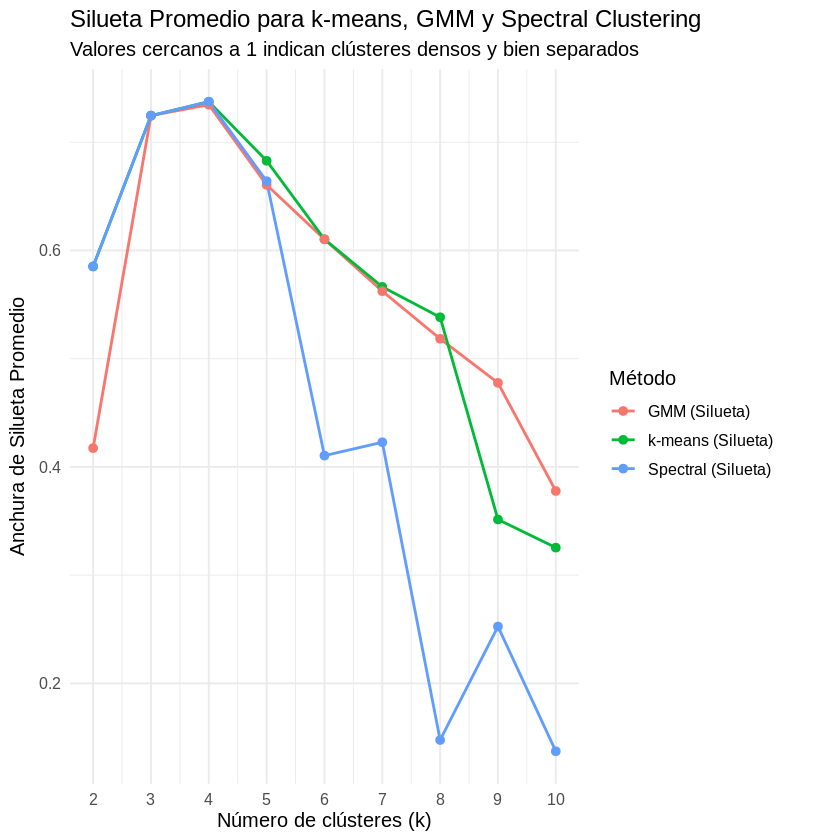

In [ ]:
# Representamos gráficamente la Silueta Promedio
ggplot(tabla_sil_long, aes(x = k, y = silueta, color = metodo)) +
  geom_line(linewidth = 0.8) +
  geom_point(size = 2) +
  labs(title = "Silueta Promedio para k-means, GMM y Spectral Clustering",
       subtitle = "Valores cercanos a 1 indican clústeres densos y bien separados",
       x     = "Número de clústeres (k)",
       y     = "Anchura de Silueta Promedio",
       color = "Método") +
  scale_x_continuous(breaks = tabla_sil$k) +
  theme_minimal(base_size = 12)

**Interpretación.-**  

El gráfico muestra la evolución de la **silueta promedio** para *k-means*, *GMM* y *Spectral Clustering* en función del número de clústeres $k$. Se observa un comportamiento muy consistente entre *k-means* y *GMM*, ambos alcanzando sus **valores máximos en torno a $k = 3$–$4$**, con siluetas cercanas a $0.75$, lo que indica clústeres **bien cohesionados y claramente separados**. Este resultado sugiere que la estructura intrínseca de los datos se describe adecuadamente con un número reducido de grupos.

A partir de $k > 4$, la silueta disminuye progresivamente en ambos métodos, reflejando un proceso de **sobre–segmentación**, en el que los clústeres se vuelven menos compactos y más solapados. En particular, *GMM* presenta una degradación más suave que *k-means*, lo que indica una mayor flexibilidad para adaptarse a estructuras elipsoidales.

Por su parte, **Spectral Clustering** muestra un comportamiento más inestable: aunque alcanza valores altos en $k = 3$–$4$, la silueta cae de forma abrupta para $k \geq 6$, llegando a valores muy bajos. Esto indica una **alta sensibilidad al número de clústeres** y sugiere que, para valores grandes de $k$, el método genera particiones poco coherentes con la geometría real de los datos.

En conjunto, el gráfico refuerza que el rango **$k \in \{3,4\}$** proporciona la mejor calidad de agrupamiento según la silueta promedio, siendo *k-means* y *GMM* los métodos más estables y consistentes para este conjunto de datos.


In [ ]:
# Extraemos la tabla DBSCAN del objeto res_silueta
tabla_sil_db = res_silueta$tablas$dbscan

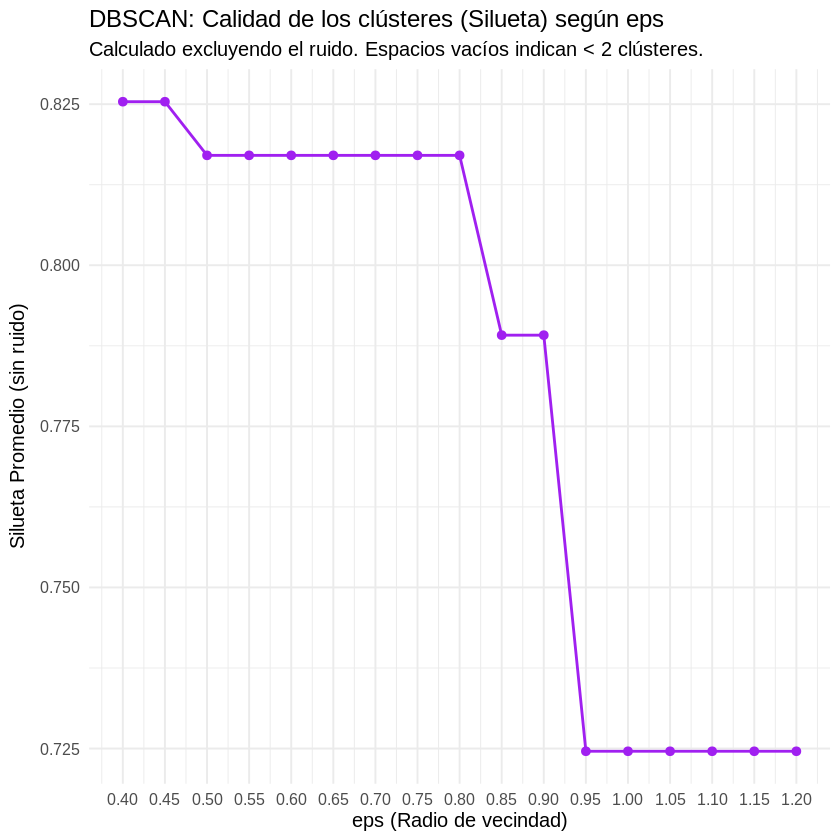

In [ ]:
# Gráfico específico para Silueta en DBSCAN
# Nota: Los NAs (donde no hubo suficientes clusters) no se pintarán, cortando la línea,
# lo cual es correcto para indicar que ahí no hay solución válida.
ggplot(tabla_sil_db, aes(x = eps, y = avg_sil_clu)) +
  geom_line(linewidth = 0.8, color = "purple") +
  geom_point(size = 2, color = "purple") +
  labs(title = "DBSCAN: Calidad de los clústeres (Silueta) según eps",
       subtitle = "Calculado excluyendo el ruido. Espacios vacíos indican < 2 clústeres.",
       x     = "eps (Radio de vecindad)",
       y     = "Silueta Promedio (sin ruido)") +
  scale_x_continuous(breaks = tabla_sil_db$eps) +
  theme_minimal(base_size = 12)

**Interpretación.-**  
El gráfico muestra la evolución deles la silueta promedio **DBSCAN** en función del parámetro `eps`. Para un amplio rango inicial (`eps` entre 0.40 y 1.15),se observa como decrece por trozos,un primer escalon sería en en 0,5 un segundo en el 0.8 y el tercer y ultimo en el 0.95 esto nos indica que es mejor no dividir en clusters.





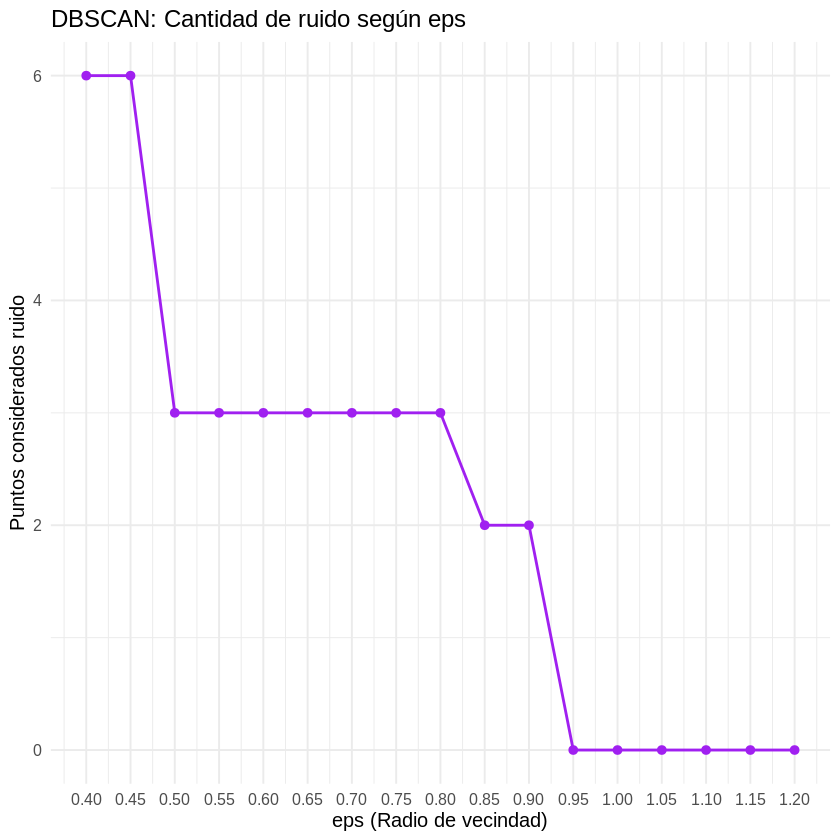

In [ ]:
# Evolución del ruido según eps
ggplot(tabla_sil_db, aes(x = eps, y = n_noise)) +
  geom_line(linewidth = 0.8, color = "purple") +
  geom_point(size = 2, color = "purple") +
  labs(title = "DBSCAN: Cantidad de ruido según eps",
       x     = "eps (Radio de vecindad)",
       y     = "Puntos considerados ruido") +
  scale_x_continuous(breaks = tabla_sil_db$eps) +
  theme_minimal(base_size = 12)

**Interpretación.-**  
La gráfica muestra la evolución del número de puntos etiquetados como **ruido** por DBSCAN en función del parámetro `eps`. Para todo el rango inicial (`eps` entre 0.40 y 1.15), el algoritmo considera **a las 18 observaciones como ruido**, lo cual indica que **no existe suficiente densidad local** para formar clústeres con `minPts = 3` en ese intervalo.

Solo cuando `eps` alcanza aproximadamente **0.95** el número de puntos ruido cae bruscamente hasta **0**, lo que significa que todos los puntos empiezan a encontrarse dentro de radios suficientemente amplios como para cumplir el criterio de densidad y formar un par de clústeres válidos.

En conjunto, el gráfico confirma que el conjunto de datos presenta una **densidad muy baja o muy dispersa**, de modo que DBSCAN no identifica regiones densas hasta valores de `eps` relativamente grandes. Esto refuerza la idea de que, para este dataset, DBSCAN solo ofrece soluciones interpretables cuando se permite un radio amplio que conecte los puntos. Ya que previo a 0.95 considera anómalos mas de un 25% de los datos, salvo la excepcio de 0.8 y 0.85 que detecta solo 2



En este apartado se añadirán las siluetas individuales por medio de un **gráfico de siluetas**, dicho gráfico  muestra qué tan bien se **ajusta cada observación** al **clúster** que ha sido **asignado comparando qué tan cerca** se **encuentra** de las **demás en su cluster**.Se realizará para los $k=6$ y $eps=1.20$ ya que han sido los valores óptimos.

De cada uno se realizarán dos representaciones aunque ambas son equivalentes se realizan para ayudar en la comprensión.

In [ ]:
# Cargamos las librerías necesarias
library(cluster) # Contiene la función silhouette()
install.packages("factoextra")
library(factoextra) # Útil para la función fviz_silhouette (más estética)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Asignaciones de clústeres
# k=6 es el valor que utilizaremos para k-means, GMM y Spectral
# Para DBSCAN, usamos la solución robusta de eps=1.15

# 1. k-means
set.seed(123) # Para reproducibilidad
res_kmeans_k3 = kmeans(datos_est, centers = 6, nstart = 25)
k_means_clusters = res_kmeans_k3$cluster

# 2. GMM
res_gmm_k3 = Mclust(datos_est, G = 6)
gmm_clusters = res_gmm_k3$classification

# 3. DBSCAN
res_dbscan_eps115 = dbscan(datos_est, eps = 1.2, minPts = 3)
dbscan_clusters = res_dbscan_eps115$cluster

In [ ]:
# Se necesita la matriz de asignación y la matriz de distancias
sil_kmeans = silhouette(k_means_clusters, datos_dist)
plot(sil_kmeans, main = "Silueta (k-means, k=6)", border = NA, col = 2:(3+1)) # colorea hasta k+1 clústeres

In [ ]:
# Alternativa para que tengáis otro gráfico similar (requiere factoextra)
fviz_silhouette(sil_kmeans)

**Interpretación.-** La silueta promedio del modelo ($0.27$) revela que la estructura global de los clústeres es **débil**, indicando que las separaciones entre grupos son modestas y que existe una proximidad considerable entre observaciones de clústeres distintos. Aun así, el análisis permite identificar patrones diferenciados en la calidad interna de cada clúster. En concreto, los clústeres **1**, **4** y **5** muestran siluetas medias entre $0.31$ y $0.35$, lo que sugiere una cohesión razonable y una separación algo más clara respecto al resto. El clúster **5**, con una silueta de $0.35$, es el mejor definido dentro del modelo.

Por el contrario, los clústeres **3** y **6** presentan valores muy bajos de silueta ($0.10$ y $0.12$), indicando una estructura claramente débil: muchas de sus observaciones están más cerca de otros clústeres que del suyo propio. El clúster **2** ocupa una posición intermedia, con una silueta de $0.28$ que refleja una separación moderada pero no sólida. En conjunto, aunque el modelo logra identificar algunos grupos con cierta coherencia interna, la baja silueta promedio sugiere que la partición en seis clústeres no captura una estructura de agrupamiento fuerte en los datos.


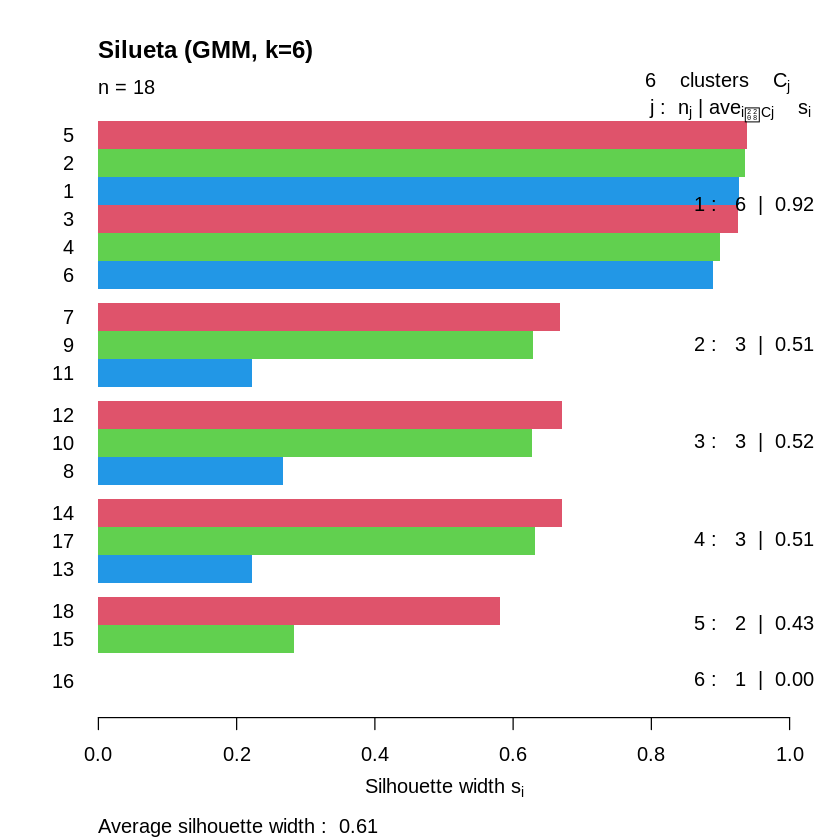

In [ ]:
# Generamos y graficamos siluetas para GMM (k=3)
sil_gmm = silhouette(gmm_clusters, datos_dist)
plot(sil_gmm, main = "Silueta (GMM, k=6)", border = NA, col = 2:(3+1))

  cluster size ave.sil.width
1       1    6          0.92
2       2    3          0.51
3       3    3          0.52
4       4    3          0.51
5       5    2          0.43
6       6    1          0.00


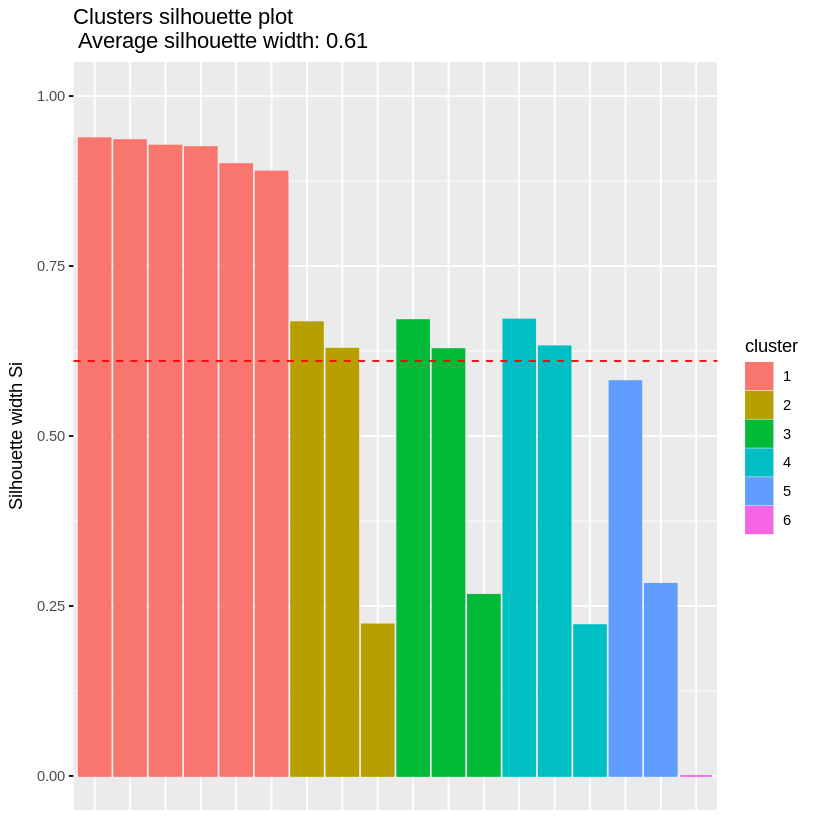

In [ ]:
# Alternativa para que tengáis otro gráfico similar (requiere factoextra)
fviz_silhouette(sil_gmm)

**Interpretación.-** La silueta promedio del modelo  revela que la estructura global de los clústeres es **media**, indicando que las separaciones entre grupos son modestas y que existe una proximidad considerable entre observaciones de clústeres distintos. Aun así, el análisis permite identificar patrones diferenciados en la calidad interna de cada clúster. En concreto, el clúster **1** muestra siluetas medias de $0.92$, lo que sugiere una cohesión muy alta y una separación algo  clara respecto al resto. Los clúster **2, 3 y 4**, con una silueta aproximadamente de $0.5$, pese a no ser tan alta como la annterior son valores de cierta coherencia interna.

Por el contrario, los clústeres **5** y **6** presentan valores muy bajos de silueta ($0.43$ y $0.0$), indicando una estructura claramente débil: muchas de sus observaciones están más cerca de otros clústeres que del suyo propio, en especial el cluster $6$.


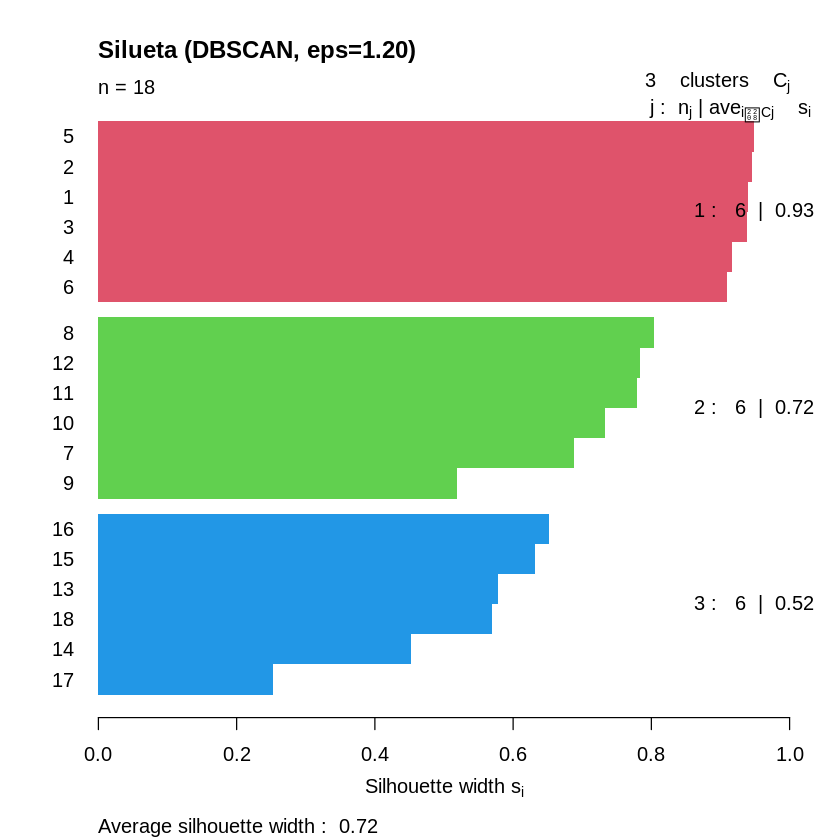

In [ ]:
# Generamos y graficamos siluetas para DBSCAN (eps=1.15)
# Importante: La función silhouette trata al clúster 0 de DBSCAN (ruido) como un clúster separado.
sil_dbscan = silhouette(dbscan_clusters, datos_dist)
plot(sil_dbscan, main = "Silueta (DBSCAN, eps=1.20)", border = NA, col = 2:(max(dbscan_clusters)+1))

  cluster size ave.sil.width
1       1    6          0.93
2       2    6          0.72
3       3    6          0.52


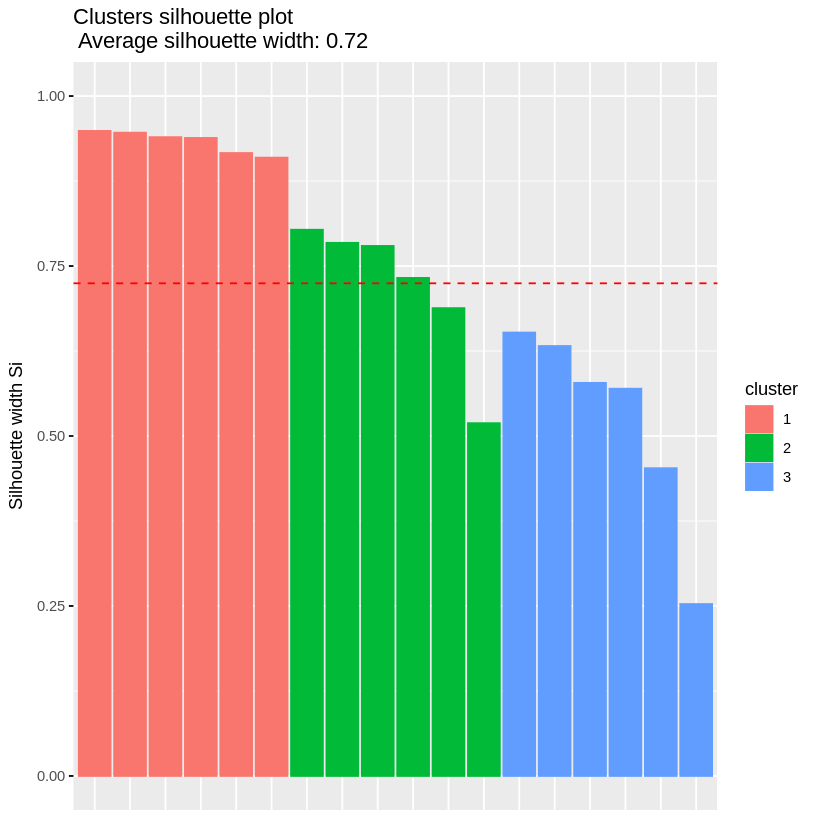

In [ ]:
# Alternativa para que tengáis otro gráfico similar (requiere factoextra)
fviz_silhouette(sil_dbscan)

**Interpretación.-** La silueta promedio del modelo  revela que la estructura global de los clústeres **se ha encontrado**, indicando que las separaciones entre grupos son grandes y que no existe una proximidad considerable entre observaciones de clústeres distintos. Aun así, el análisis permite identificar patrones diferenci


**Conclusión.-** No se ha podido indentificar un modelo óptimo debido a que entre los criterios no hay ni unidad.